# MT Impedance Tensor, Apparent Resistivity and Pentration Depth

## FZ 2017-01-24

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import glob
import numpy as np

mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'

mpl.rcParams['figure.figsize']=[30,10]

import mtpy.core.mt as mt


INFO:root:module file: E:\Githubz\mtpy2\mtpy\utils\mtpylog.pyc
INFO:root:Effective yaml configuration file E:\Githubz\mtpy2\mtpy\utils\logging.yml


In [2]:
#  !ls E:/Githubz/mtpy2/examples/data/edi_files/
!ls E:/Githubz/mtpy2/tests/data/edifiles/

15125A.edi
15126A.edi
15127A.edi
15128A.edi
15129A.edi
15130A.edi
16122A.edi
16123A.edi
16124A.edi
16125A.edi
16126A.edi
16127A.edi


In [3]:
edi_dir="E:/Githubz/mtpy2/tests/data/edifiles/"
edifiles = glob.glob(os.path.join(edi_dir, '*.edi'))

print (edifiles)

['E:/Githubz/mtpy2/tests/data/edifiles\\15125A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\15126A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\15127A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\15128A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\15129A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\15130A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\16122A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\16123A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\16124A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\16125A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\16126A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\16127A.edi']


In [4]:
import mtpy.utils

import examples.plot_penetration_depth


In [5]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

E:\Githubz\mtpy2\mtpy\analysis\zinvariants.py:227: RuntimeWarning: invalid value encountered in arcsin
  strikeangerr = abs(.5 * np.arcsin(inv7)) * (180 / np.pi)


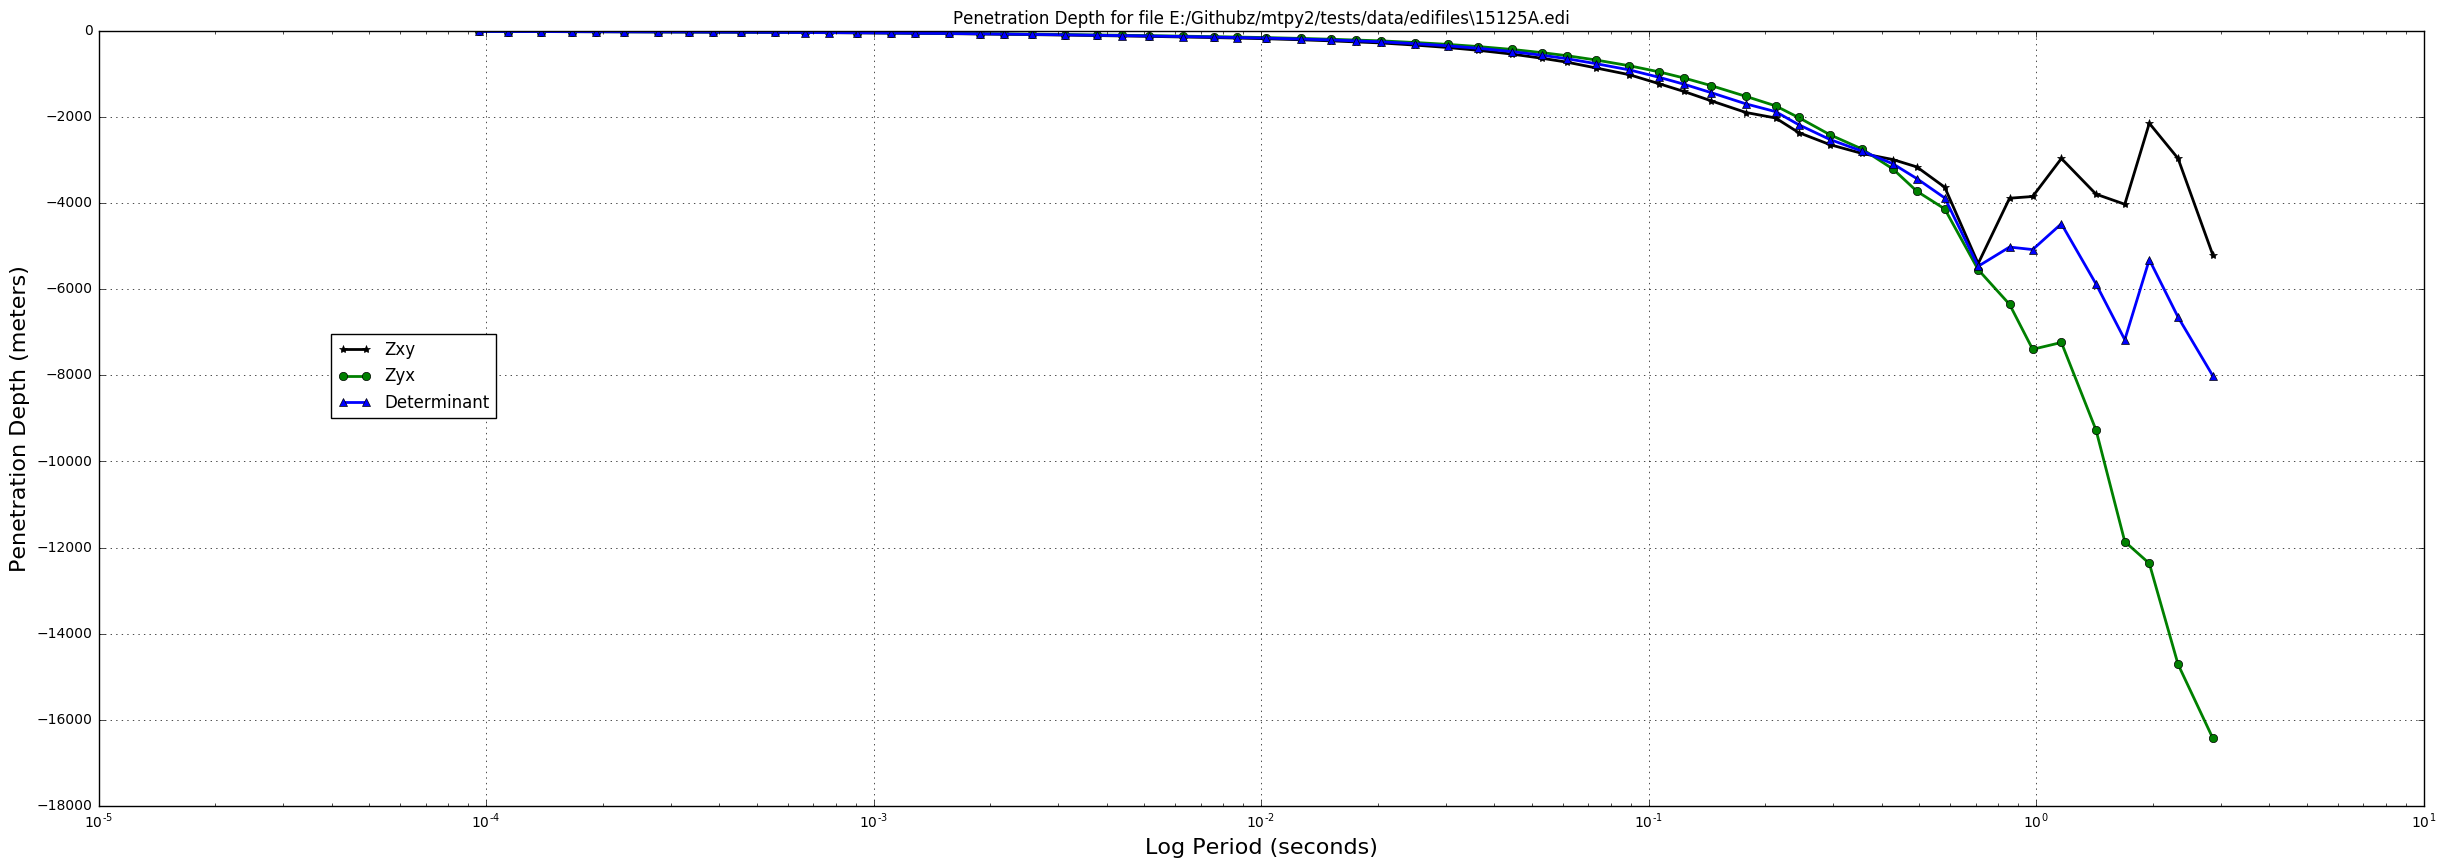

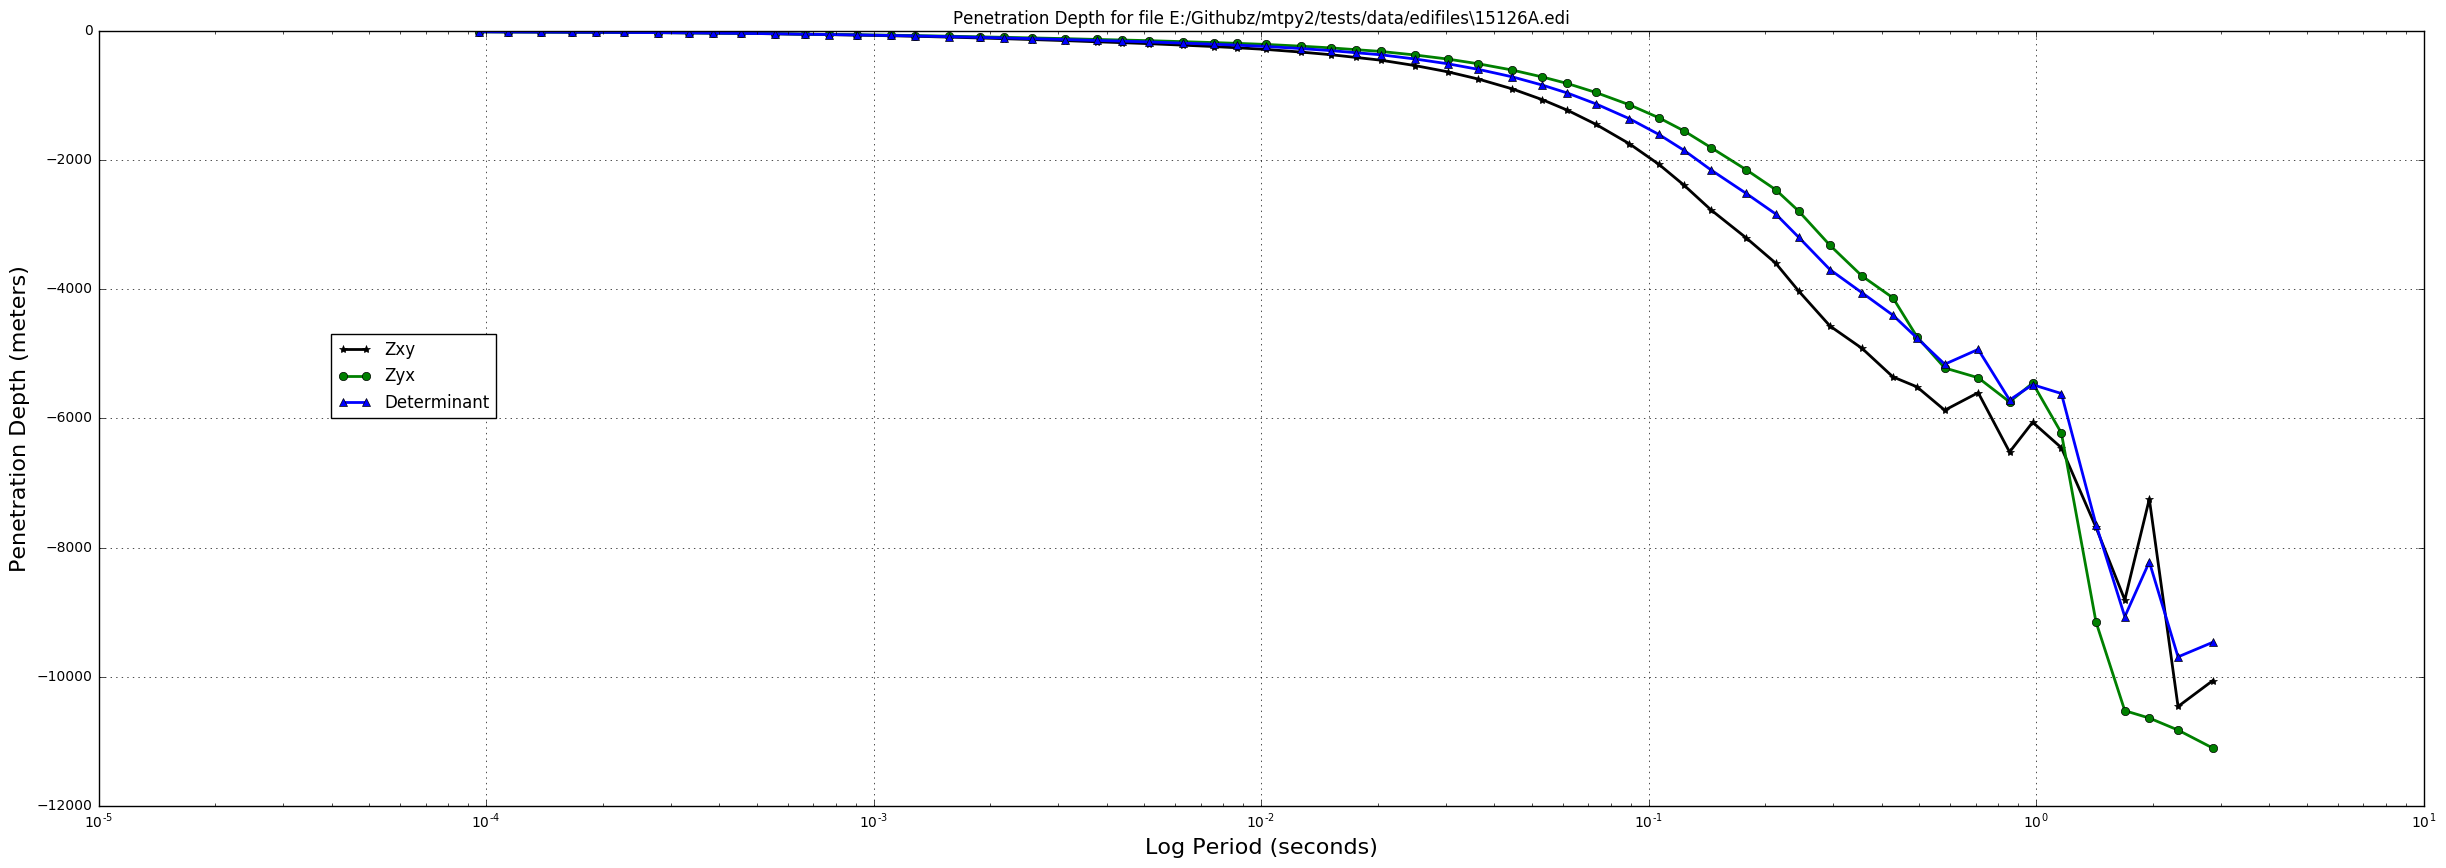

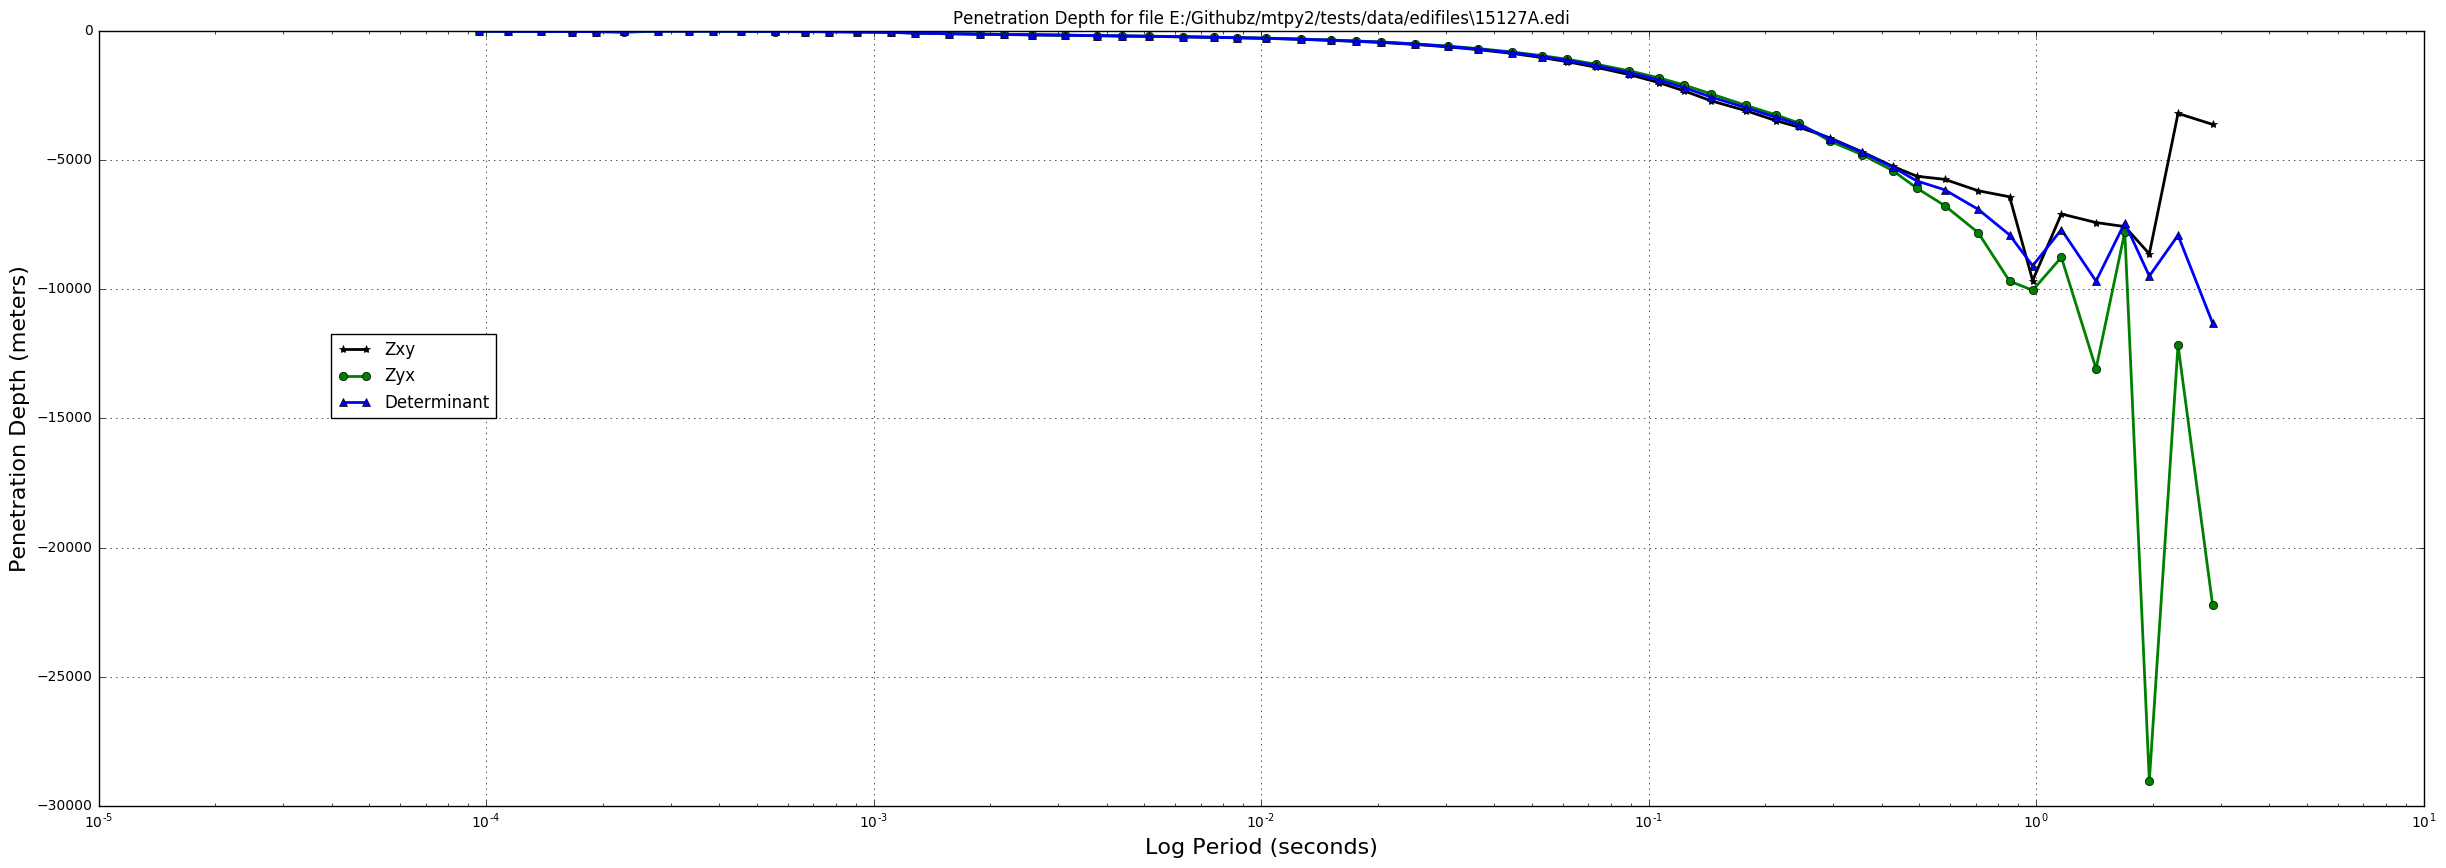

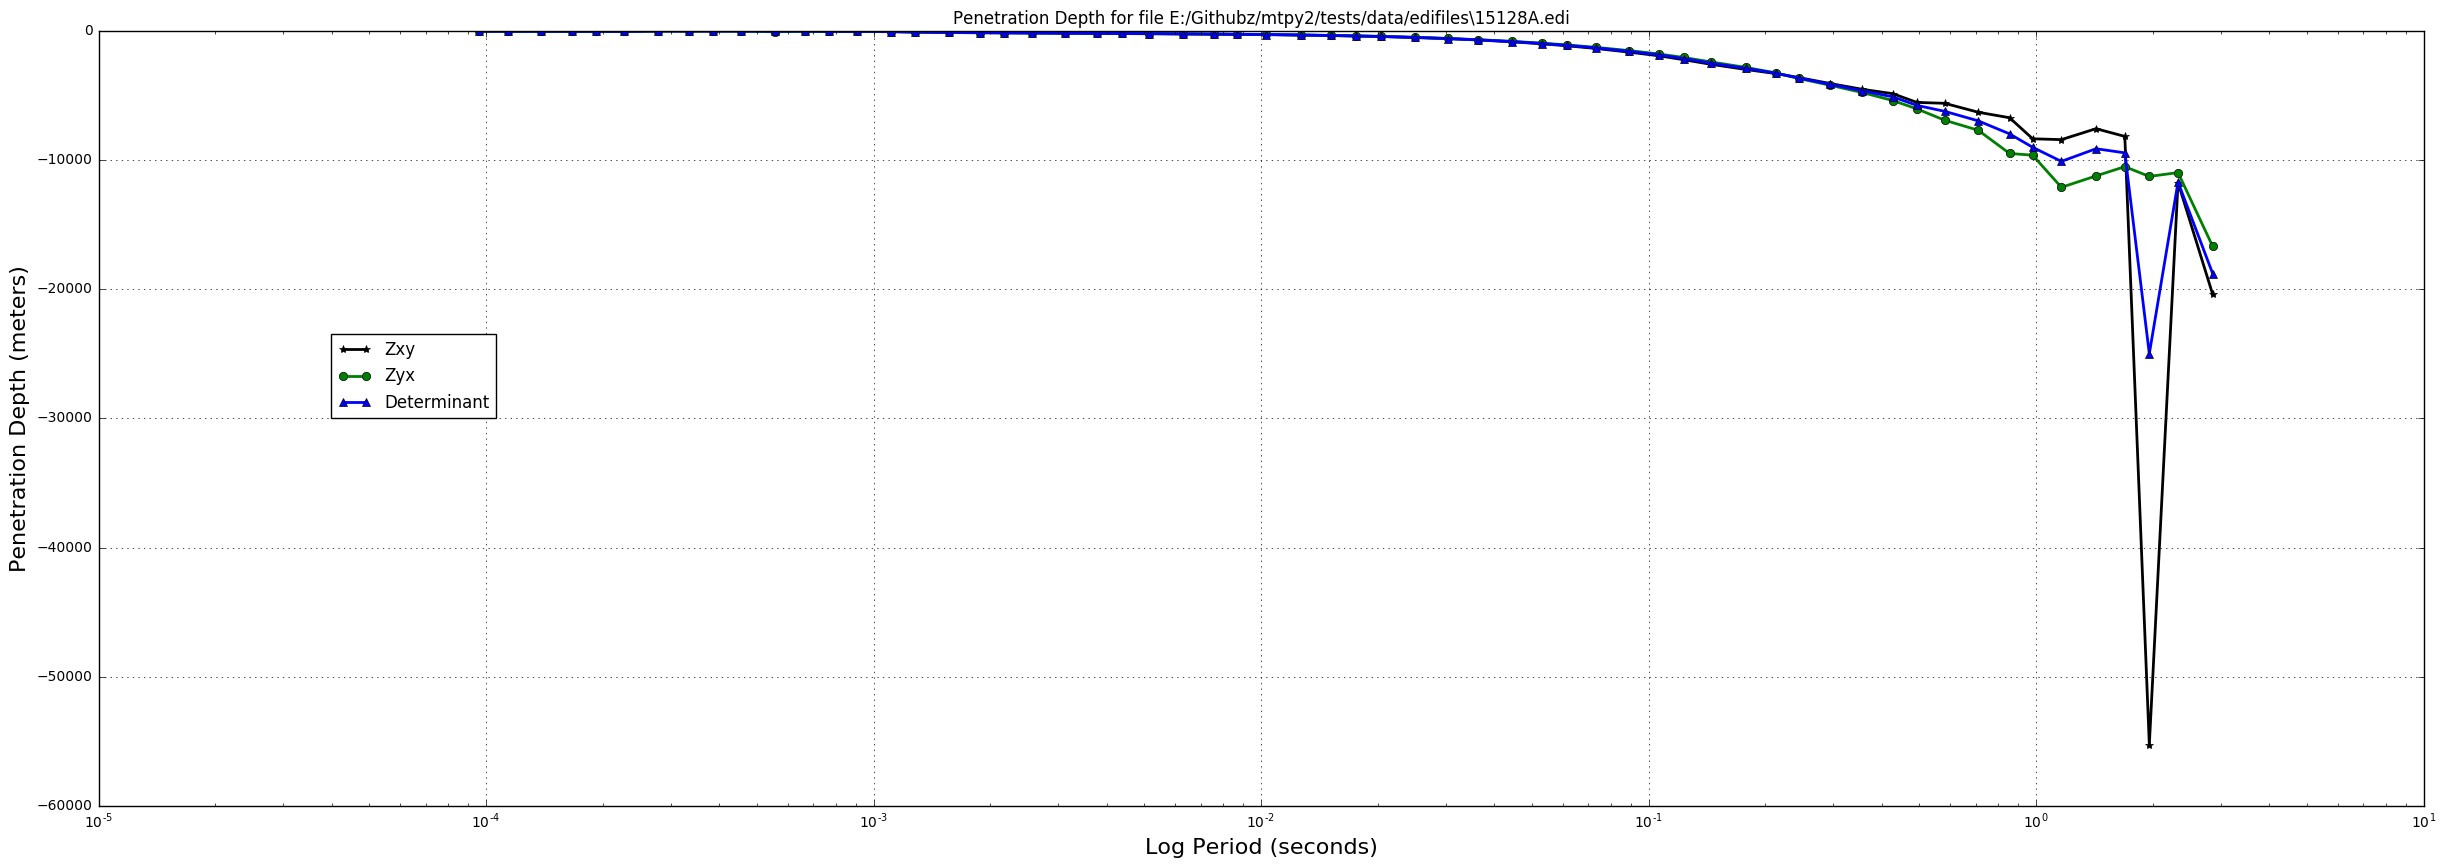

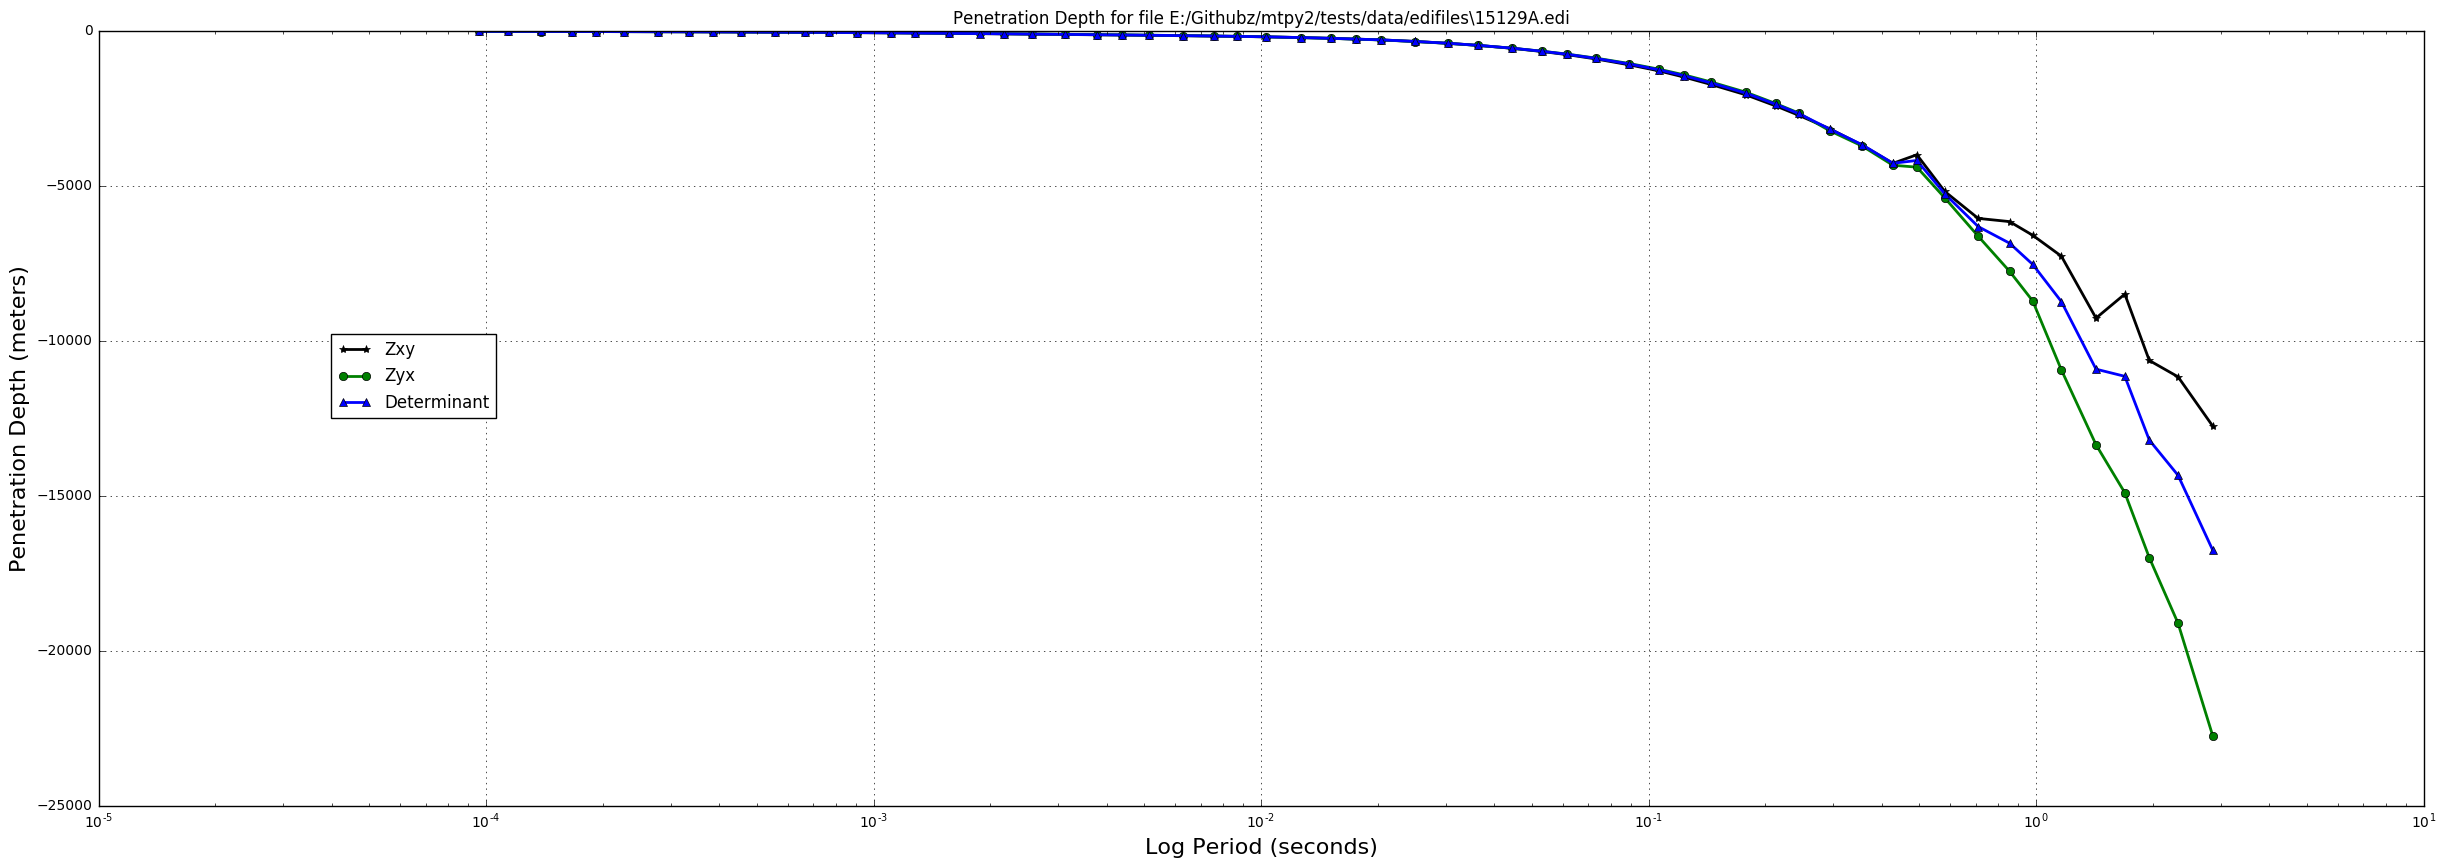

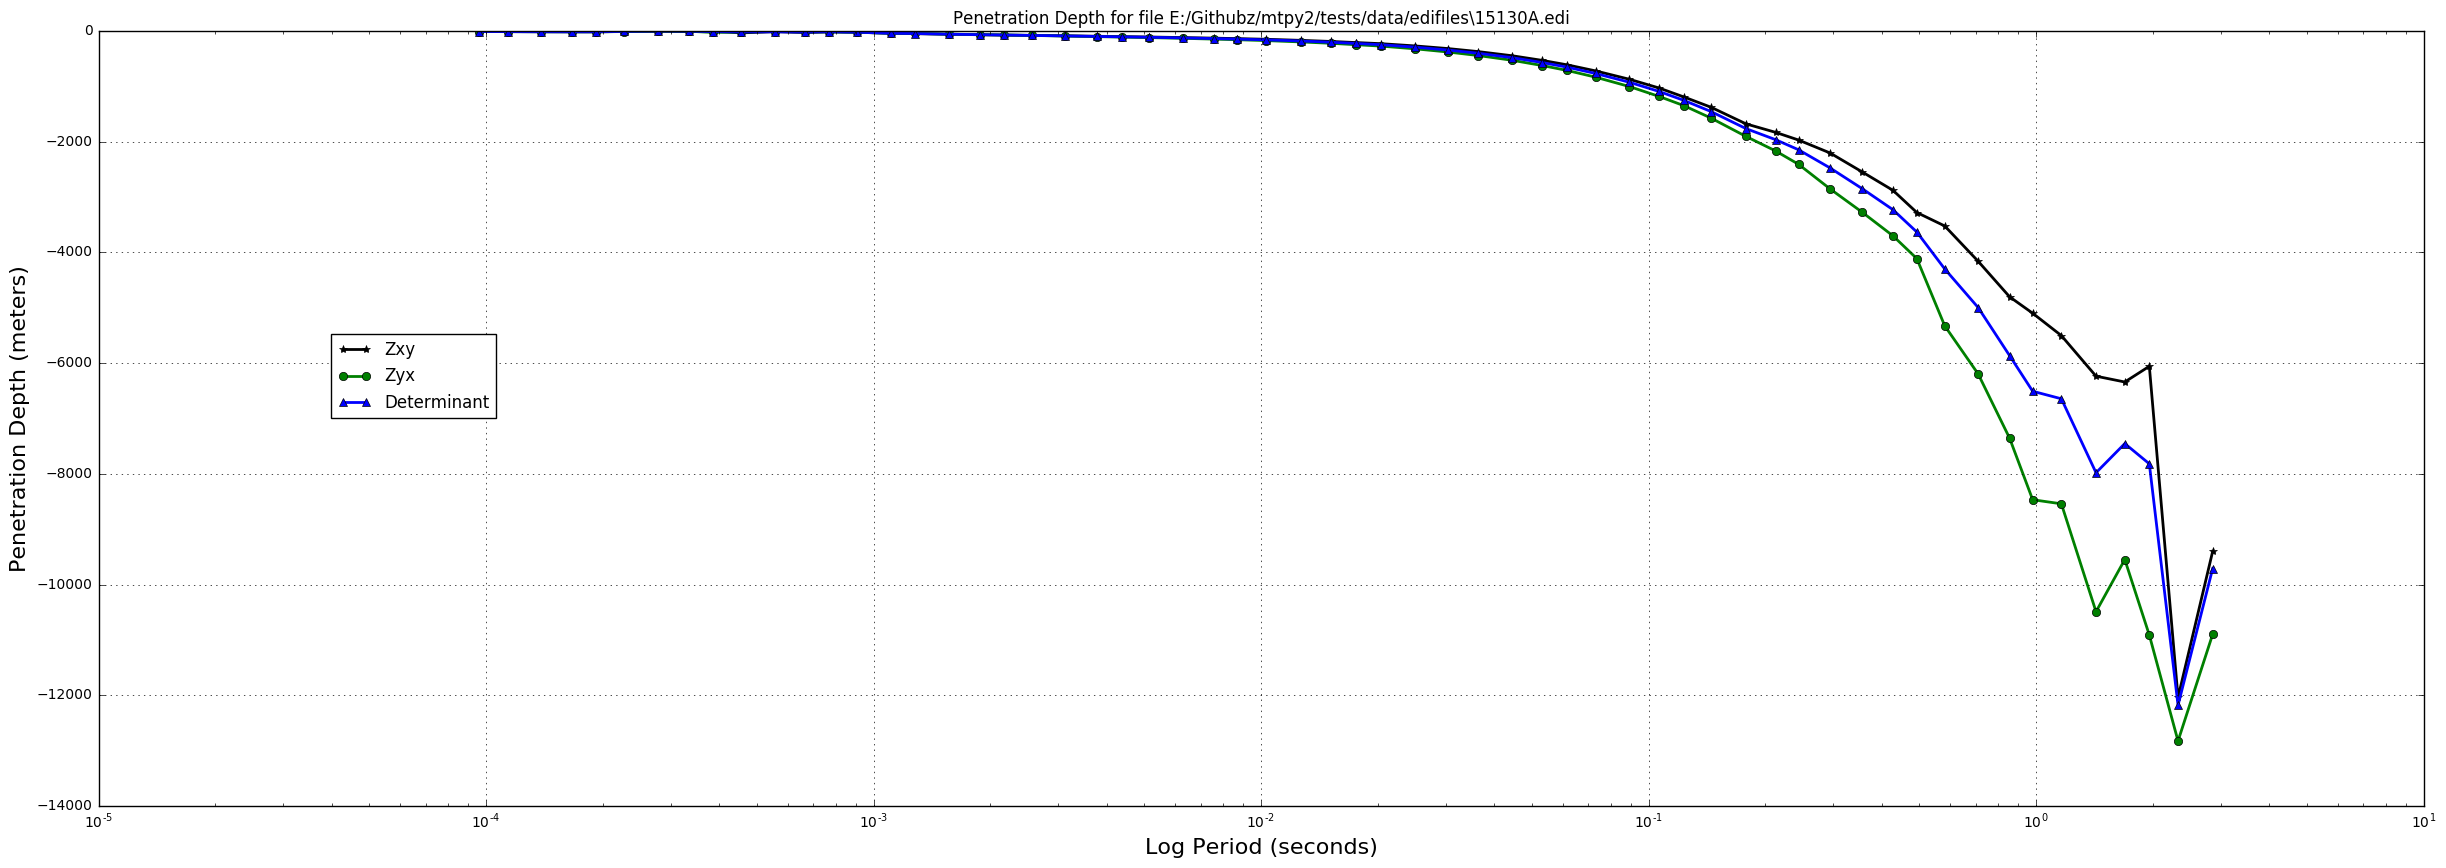

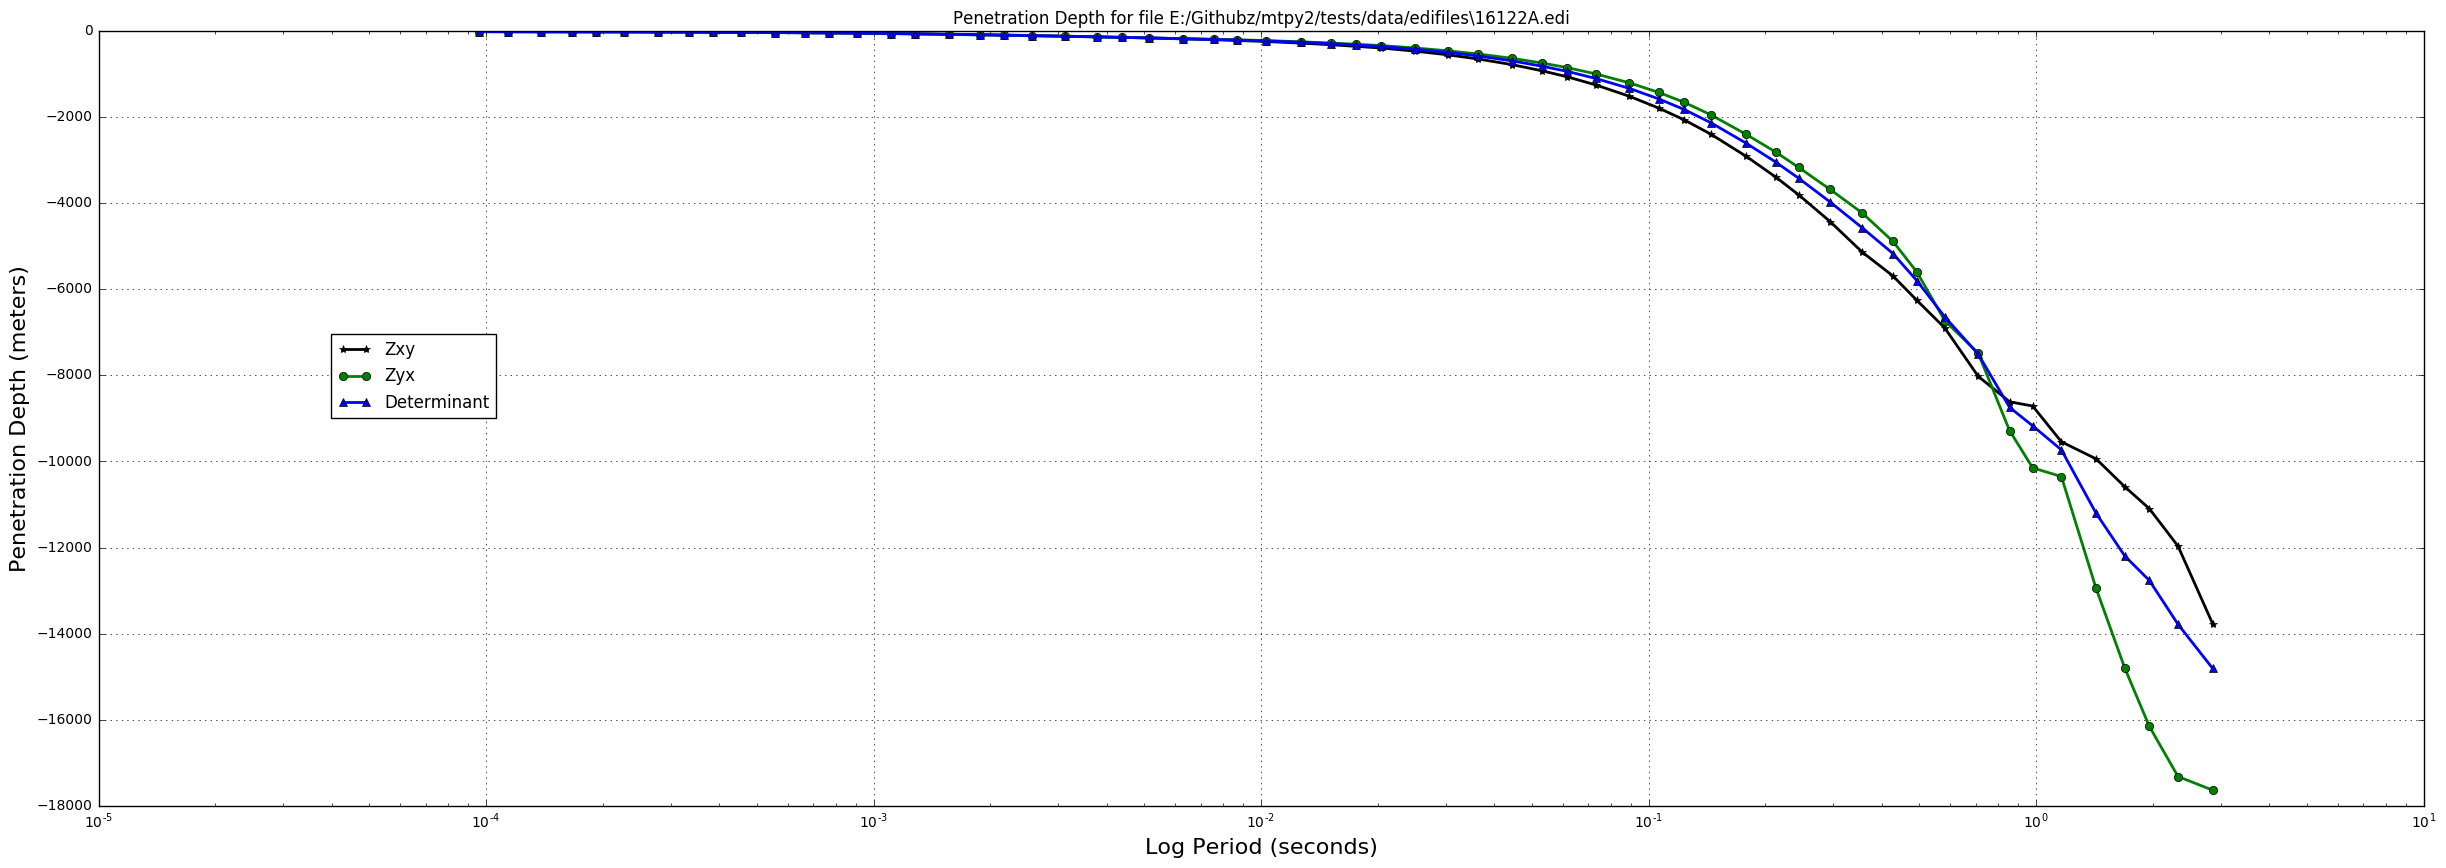

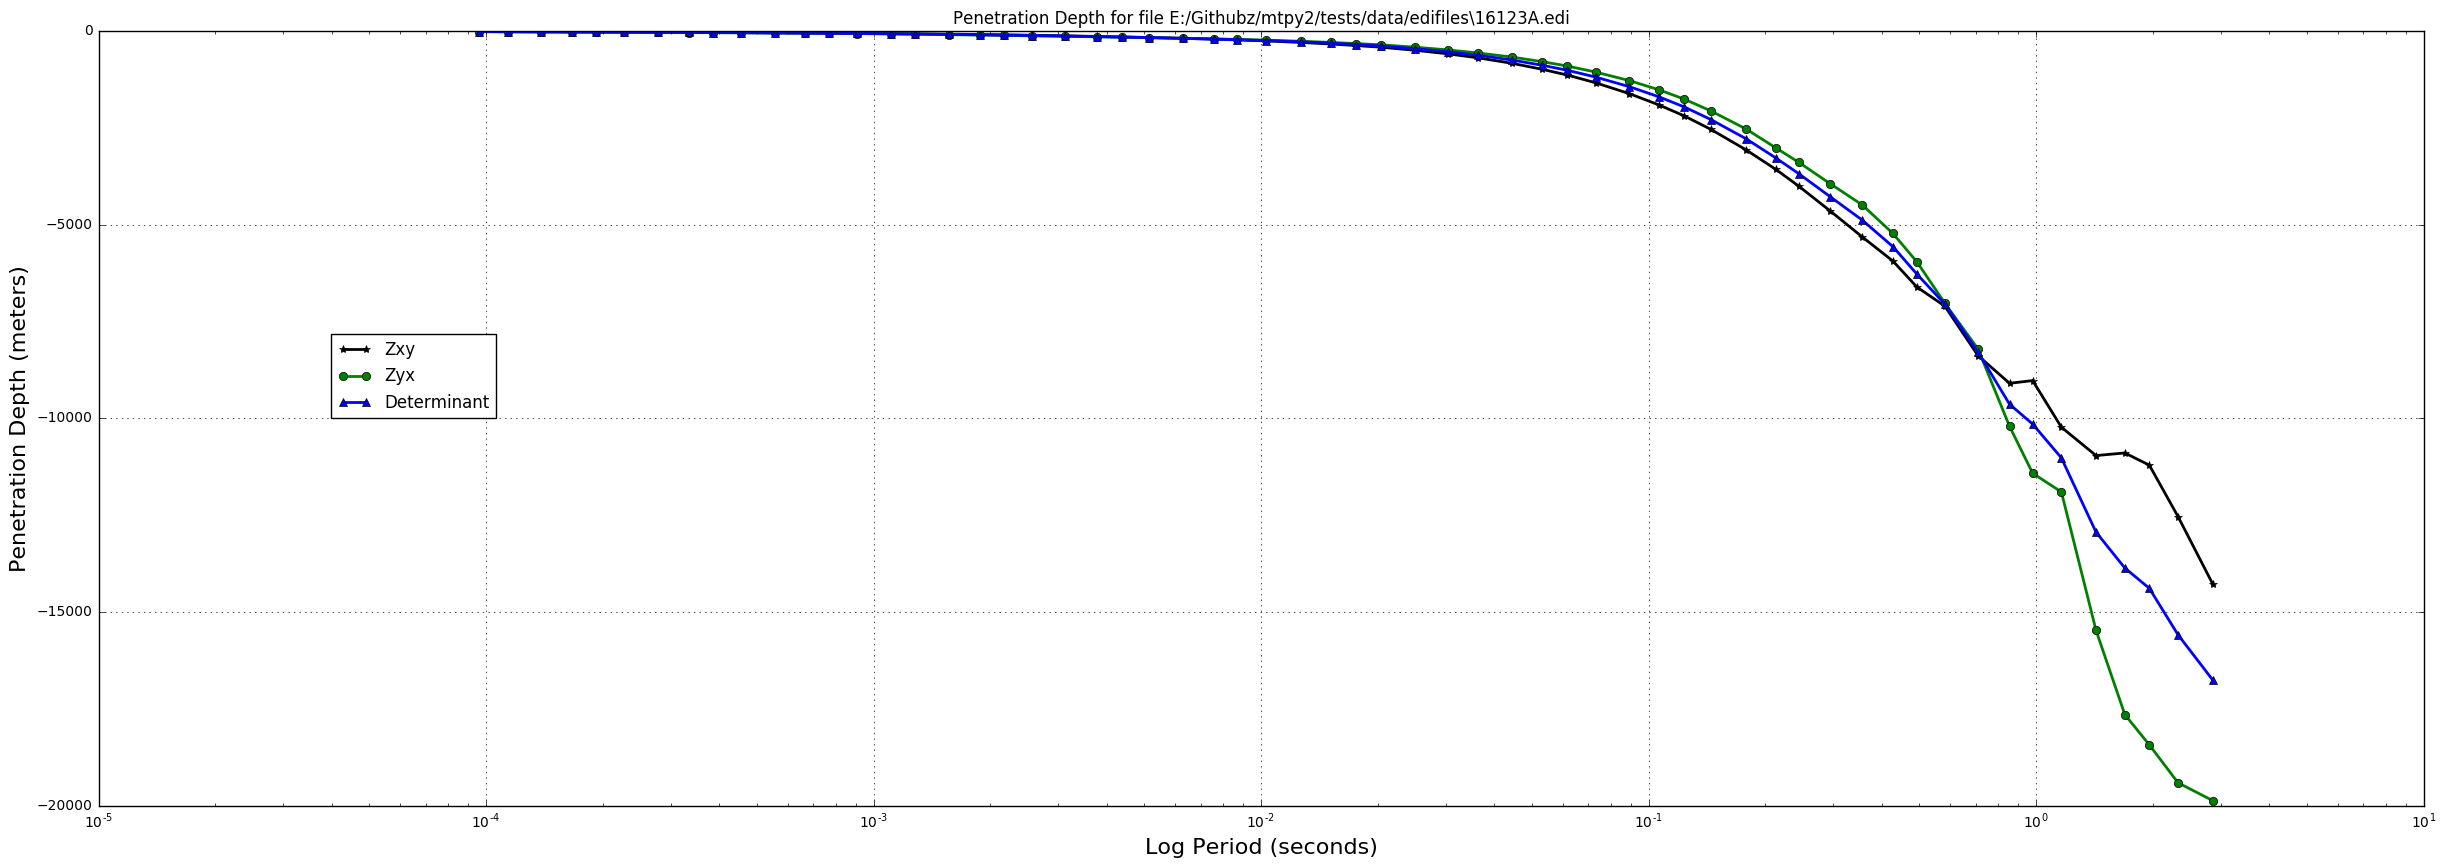

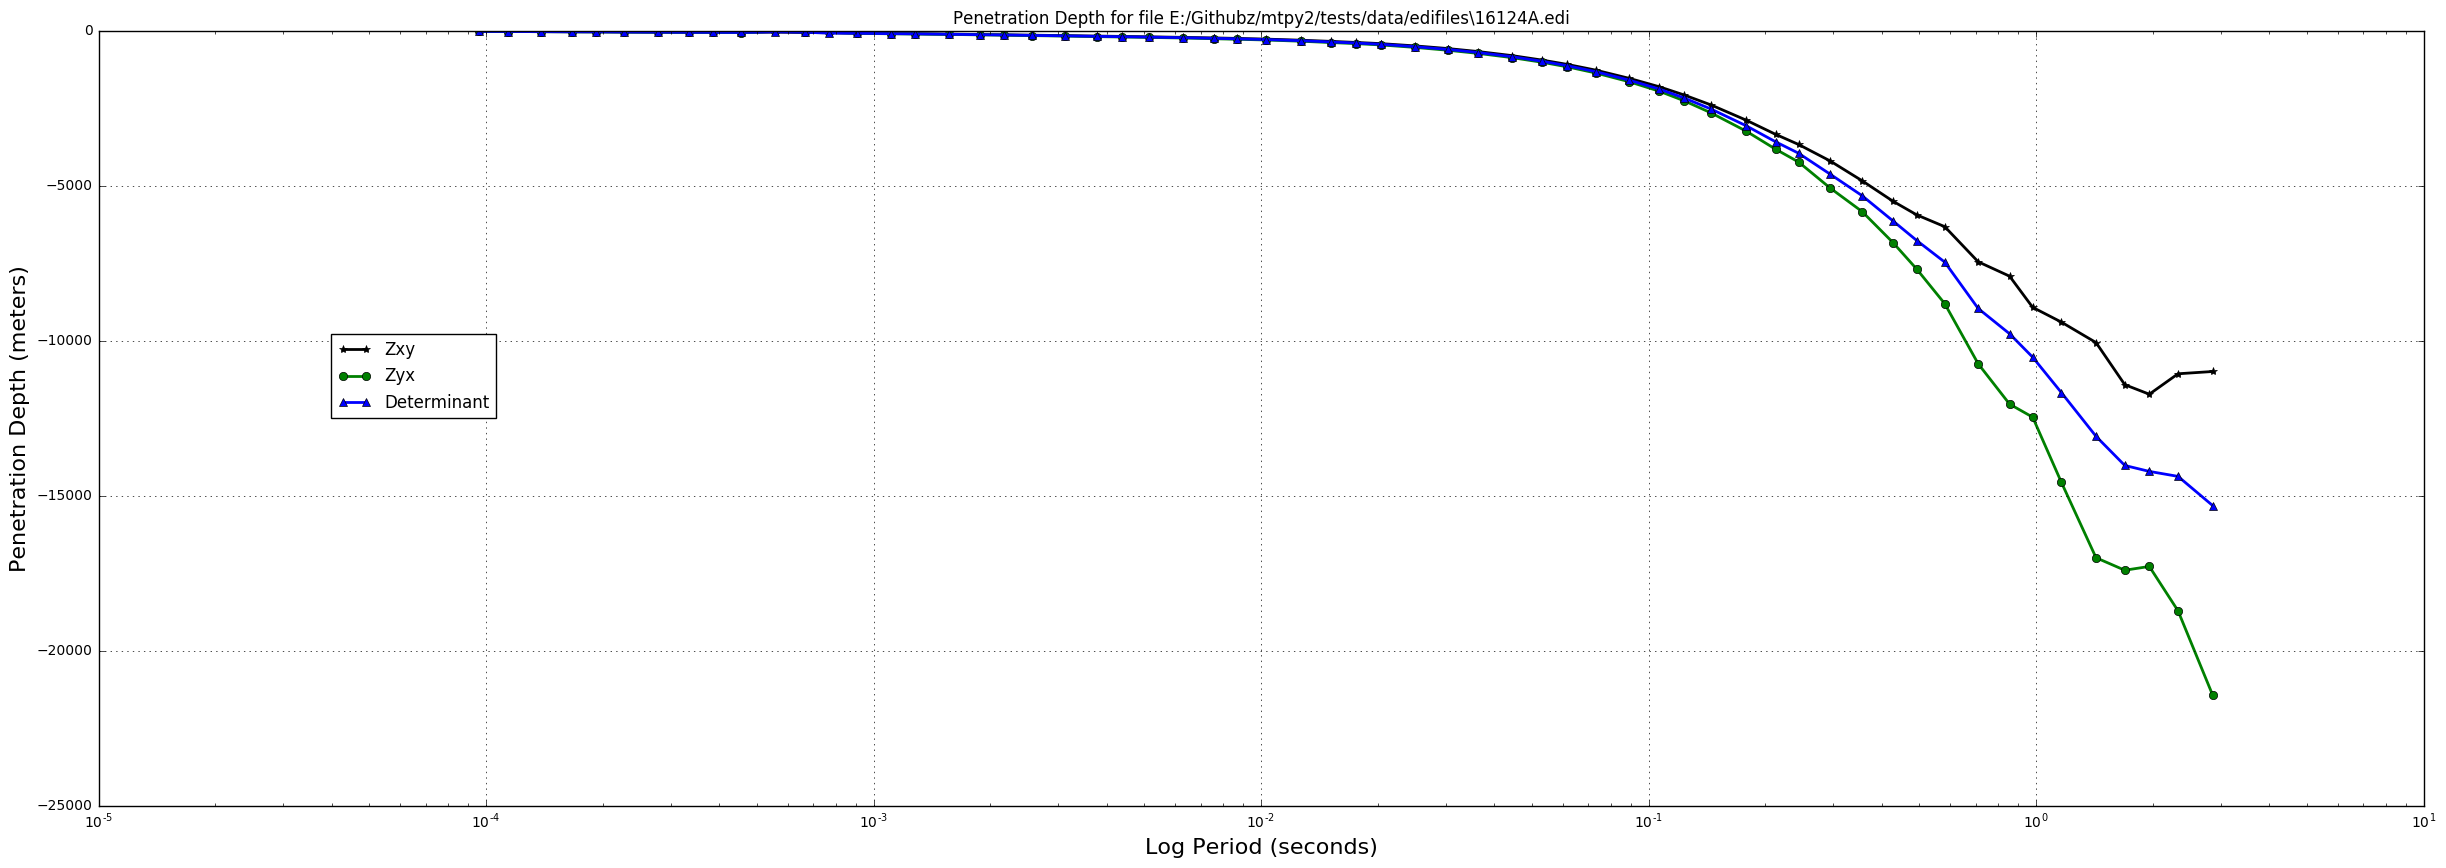

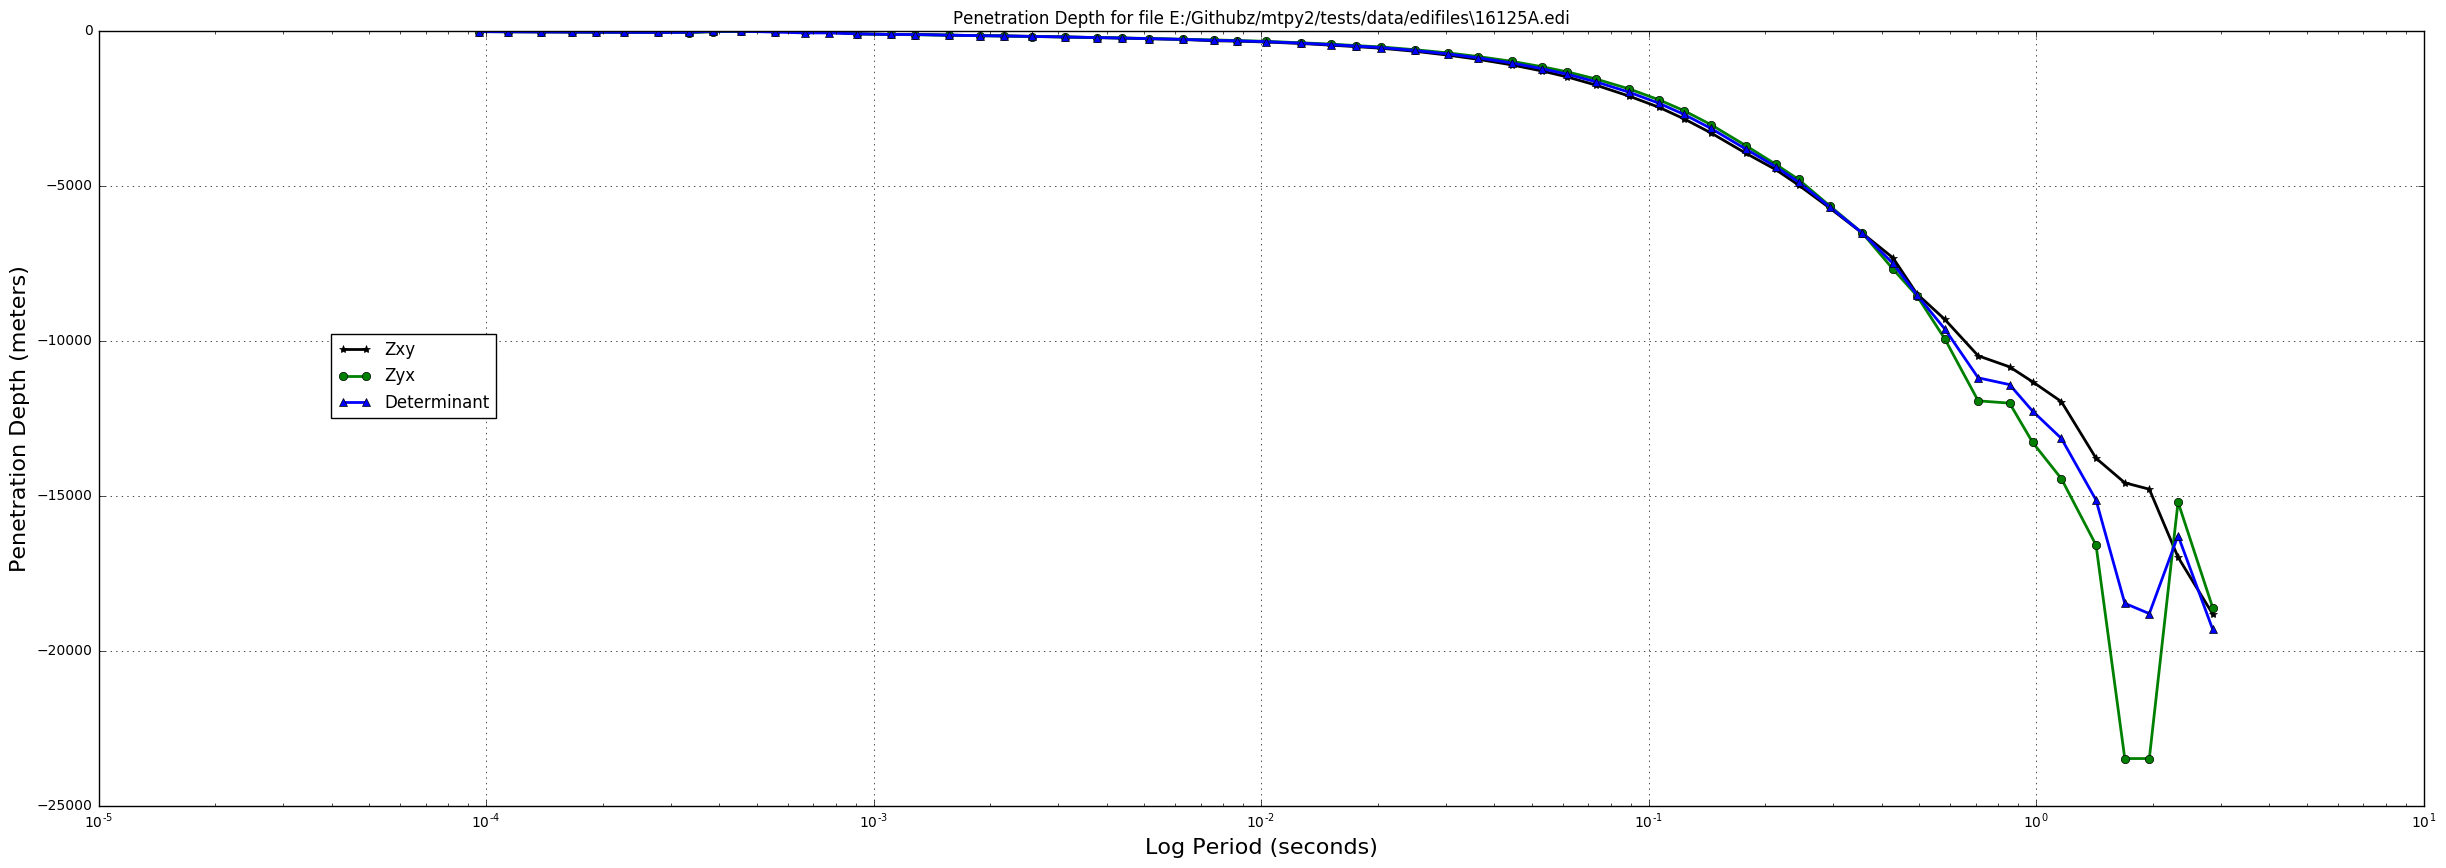

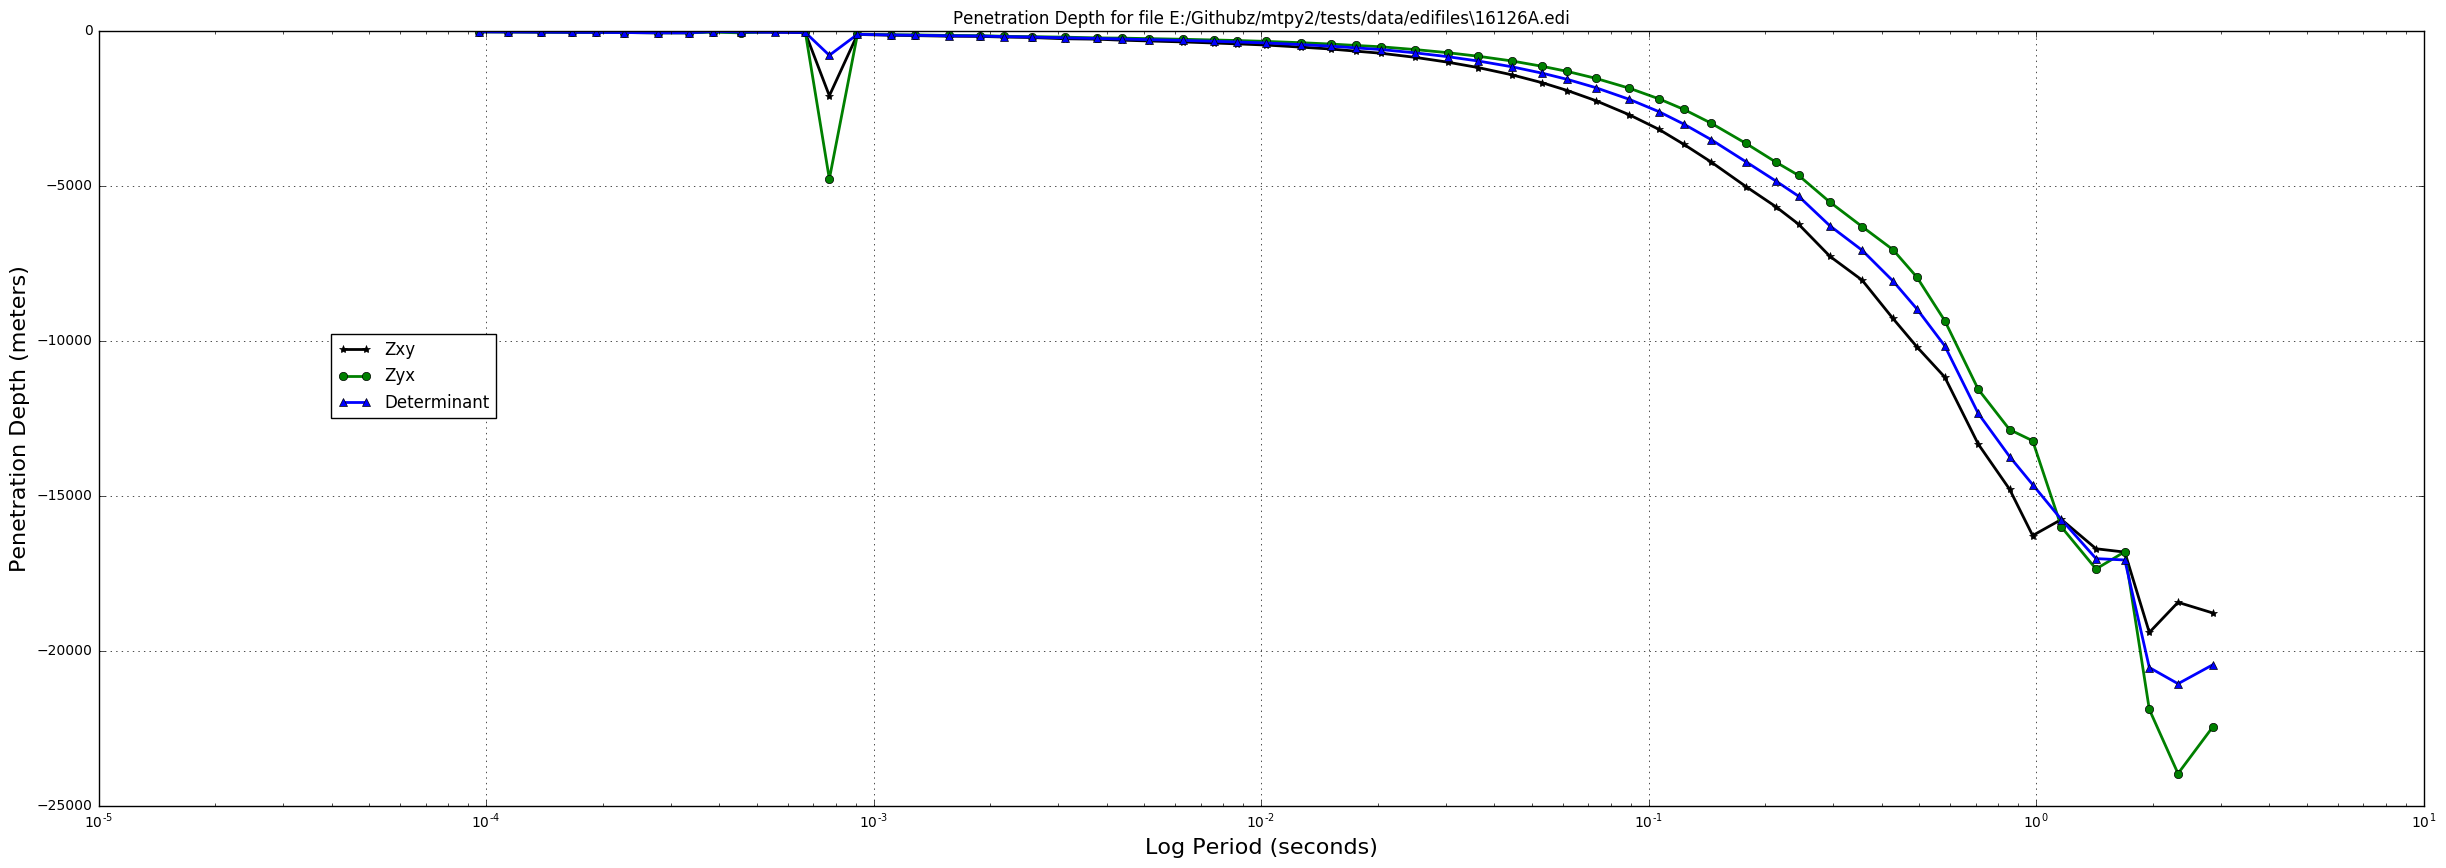

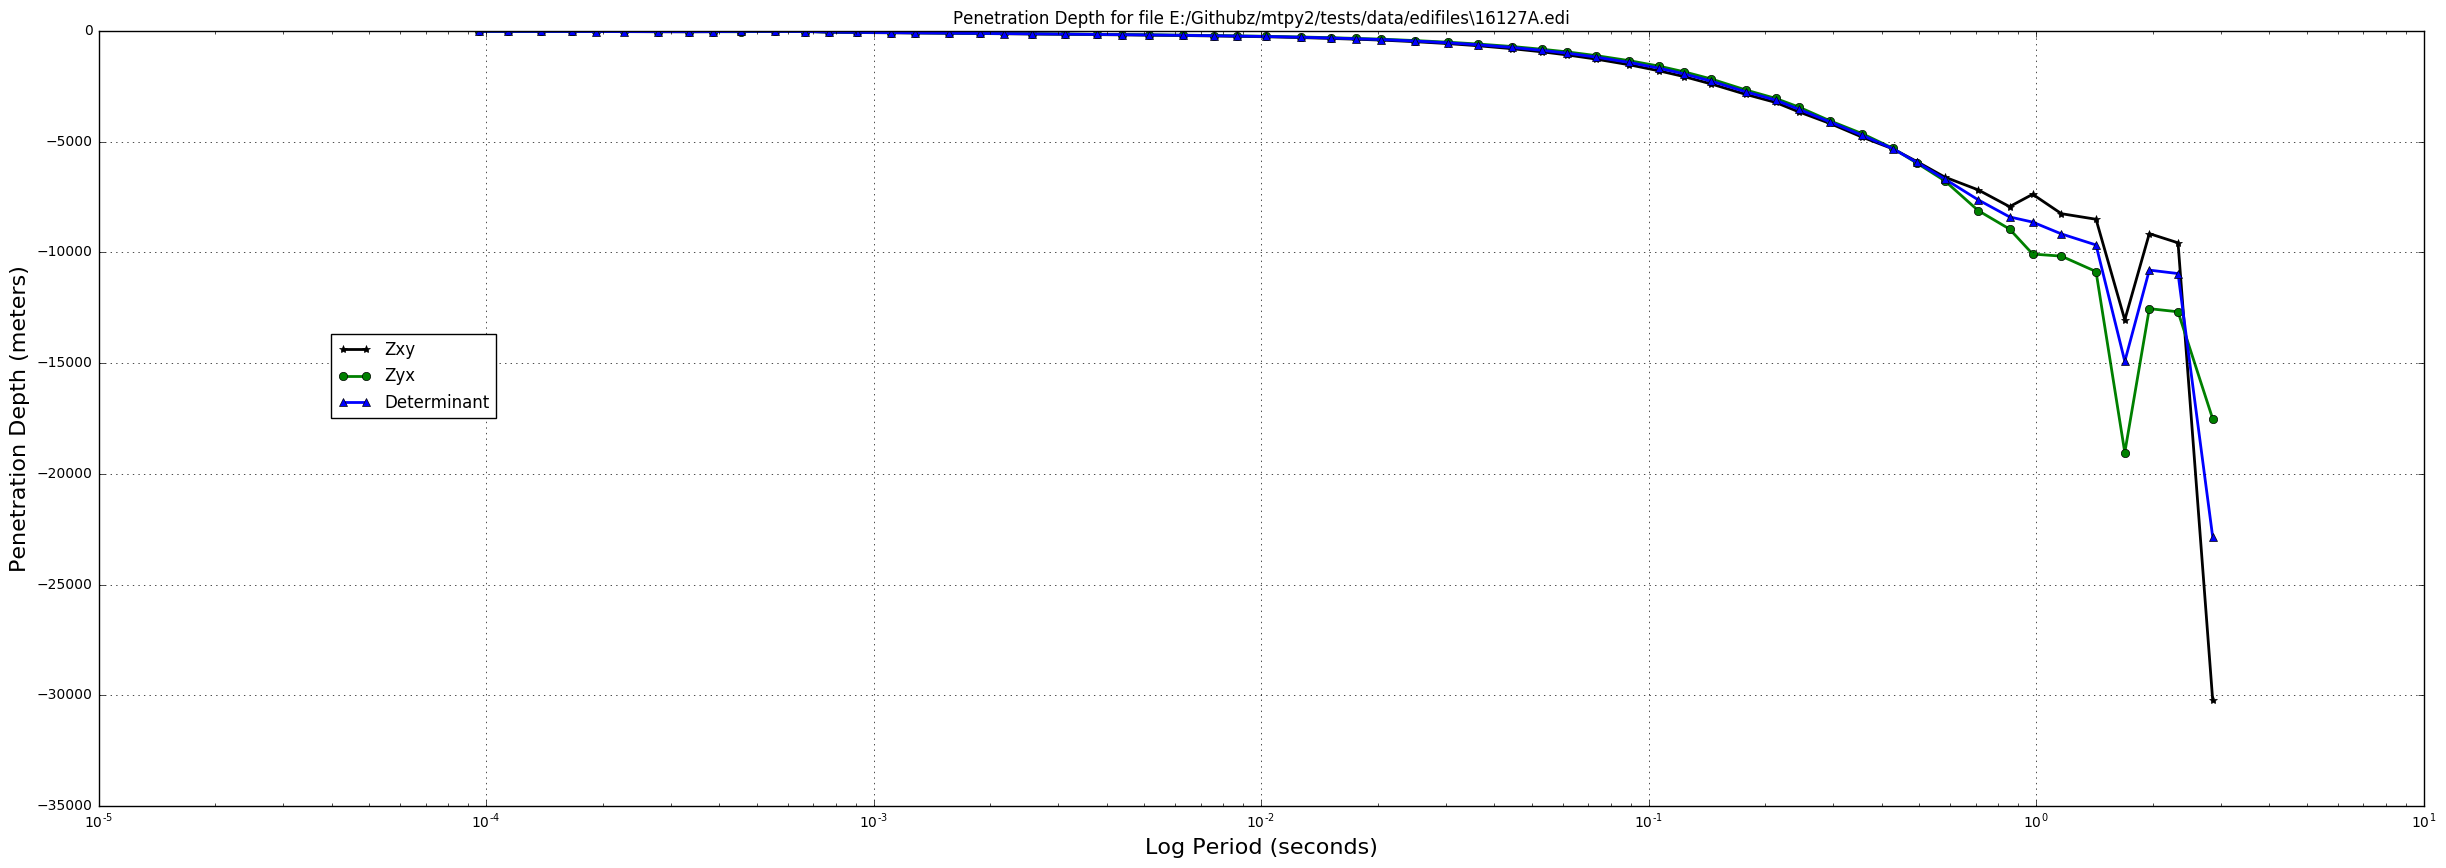

In [6]:
for afile in edifiles:
    examples.plot_penetration_depth.plot_edi_file(afile)
    

# Inspect an MT object which is constructed from an edifile

In [7]:
#edifile="E:/Githubz/mtpy2/examples/data/edi_files/pb42c.edi"

edifile="E:/Githubz/mtpy2/tests/data/edifiles/15125A.edi"
mt_obj = mt.MT(edifile)

# edifile2="E:/Githubz/mtpy2/tests/data/edifiles/15126A.edi"
# mt_obj2 = mt.MT(edifile2)

# Plot MT response: 

# plot all components of mt response and phase tensor
#plot_obj = mt_obj.plot_mt_response(plot_num=2)  # plot_pt='y')     

# plot the tipper as well

# plot_obj.plot_tipper = 'yri'
# plot_obj.redraw_plot()

In [8]:
print(mt_obj.station)

print(type(mt_obj.Z.freq))



15125A
<type 'numpy.ndarray'>


In [9]:
zeta=mt_obj.Z

In [10]:
def inspect_mt_obj(path2edifile):
    """ construct a mt object and inspect its attributes/properties
    """
    
    print("Construct a mt object and inspect its attributes")
    
    mt_obj = mt.MT(edifile)
    
    # the attribute Z
    zeta=mt_obj.Z

    freqs=zeta.freq

    # frequencies
    print(freqs)
    
    print("The impendance tensor Z, a complex-valued 2X2 matrix")
    print (zeta.z.shape)  # the impendance tensor complex matrix
    print (zeta.z_err.shape)

    print("show values of zeta.z")
    print(zeta.z[:2,:,:])

    
    print("The phase tensor matrix ")
    print (zeta.phase.shape) # The phase tensor matrix
    print (zeta.phase_err.shape)

              
    print("The Apparent Resistivity matrices: 0.2T *Z**2 ")
    print(zeta.resistivity.shape)    
    print(zeta.resistivity[:2,:,:])  # first few 2X2 matrix

    print (zeta.resistivity_err.shape) # errabar

    print("Determinat and error-bar: ", len(zeta.det))

    print("the complex value of the 2X2 matrix's determinant and real-valued errors")
    print(len(zeta.det[0]),  len(zeta.det[1]) )  
   
    # first few values
    print(zeta.det[0][:3])
    print(zeta.det[1][:3]) #  real numbers, error bars

    return

##### Test Call the function 
inspect_mt_obj(edifile)


Construct a mt object and inspect its attributes
[  1.04000100e+04   8.79999800e+03   7.20000000e+03   6.00000000e+03
   5.20000100e+03   4.40000000e+03   3.60000000e+03   3.00000100e+03
   2.60000000e+03   2.20000000e+03   1.80000000e+03   1.50000000e+03
   1.30000000e+03   1.10000000e+03   8.99999900e+02   7.80000000e+02
   6.40000100e+02   5.29999900e+02   4.60000000e+02   3.90000100e+02
   3.20000100e+02   2.65000000e+02   2.29000000e+02   1.94000000e+02
   1.59000000e+02   1.32000000e+02   1.15000000e+02   9.69999900e+01
   7.90000100e+01   6.60000000e+01   5.70000000e+01   4.90000000e+01
   4.00000000e+01   3.30000000e+01   2.75000000e+01   2.25000000e+01
   1.88000000e+01   1.62000000e+01   1.37000000e+01   1.12000000e+01
   9.40000000e+00   8.10000000e+00   6.90000000e+00   5.60000000e+00
   4.70000000e+00   4.10000000e+00   3.40000000e+00   2.81000000e+00
   2.34000000e+00   2.03000000e+00   1.72000000e+00   1.41000000e+00
   1.17000000e+00   1.02000000e+00   8.60000000e-01   

# Penetration Depth 

In [11]:
# Penetration Depth Parameter
#The parameter sqrt(1/(2 pi mu_0))
P_scale_meter =np.sqrt(1.0 / (2.0 * np.pi * 4 * np.pi * 10 ** (-7)))
print(P_scale_meter)
#The parameter
scale_param = np.sqrt(1.0 / (2.0 * np.pi * 4 * np.pi * 10 ** (-7)))
print(scale_param)

355.881271709
355.881271709


In [12]:
def plot_resistivity(period, edifiles):
    
    #per_index=2
    per_index= period
    
    app_resis=[]
    stations=[]
    for afile in edifiles:
        mt_obj = mt.MT(afile)
    
        # the attribute Z
        zeta=mt_obj.Z
        per=1.0/zeta.freq[per_index]
        app_resis.append(-zeta.resistivity[per_index,0,1])
        stations.append(mt_obj.station)
        
    plt.plot(app_resis,color='b', marker='o')
    return (stations, app_resis )

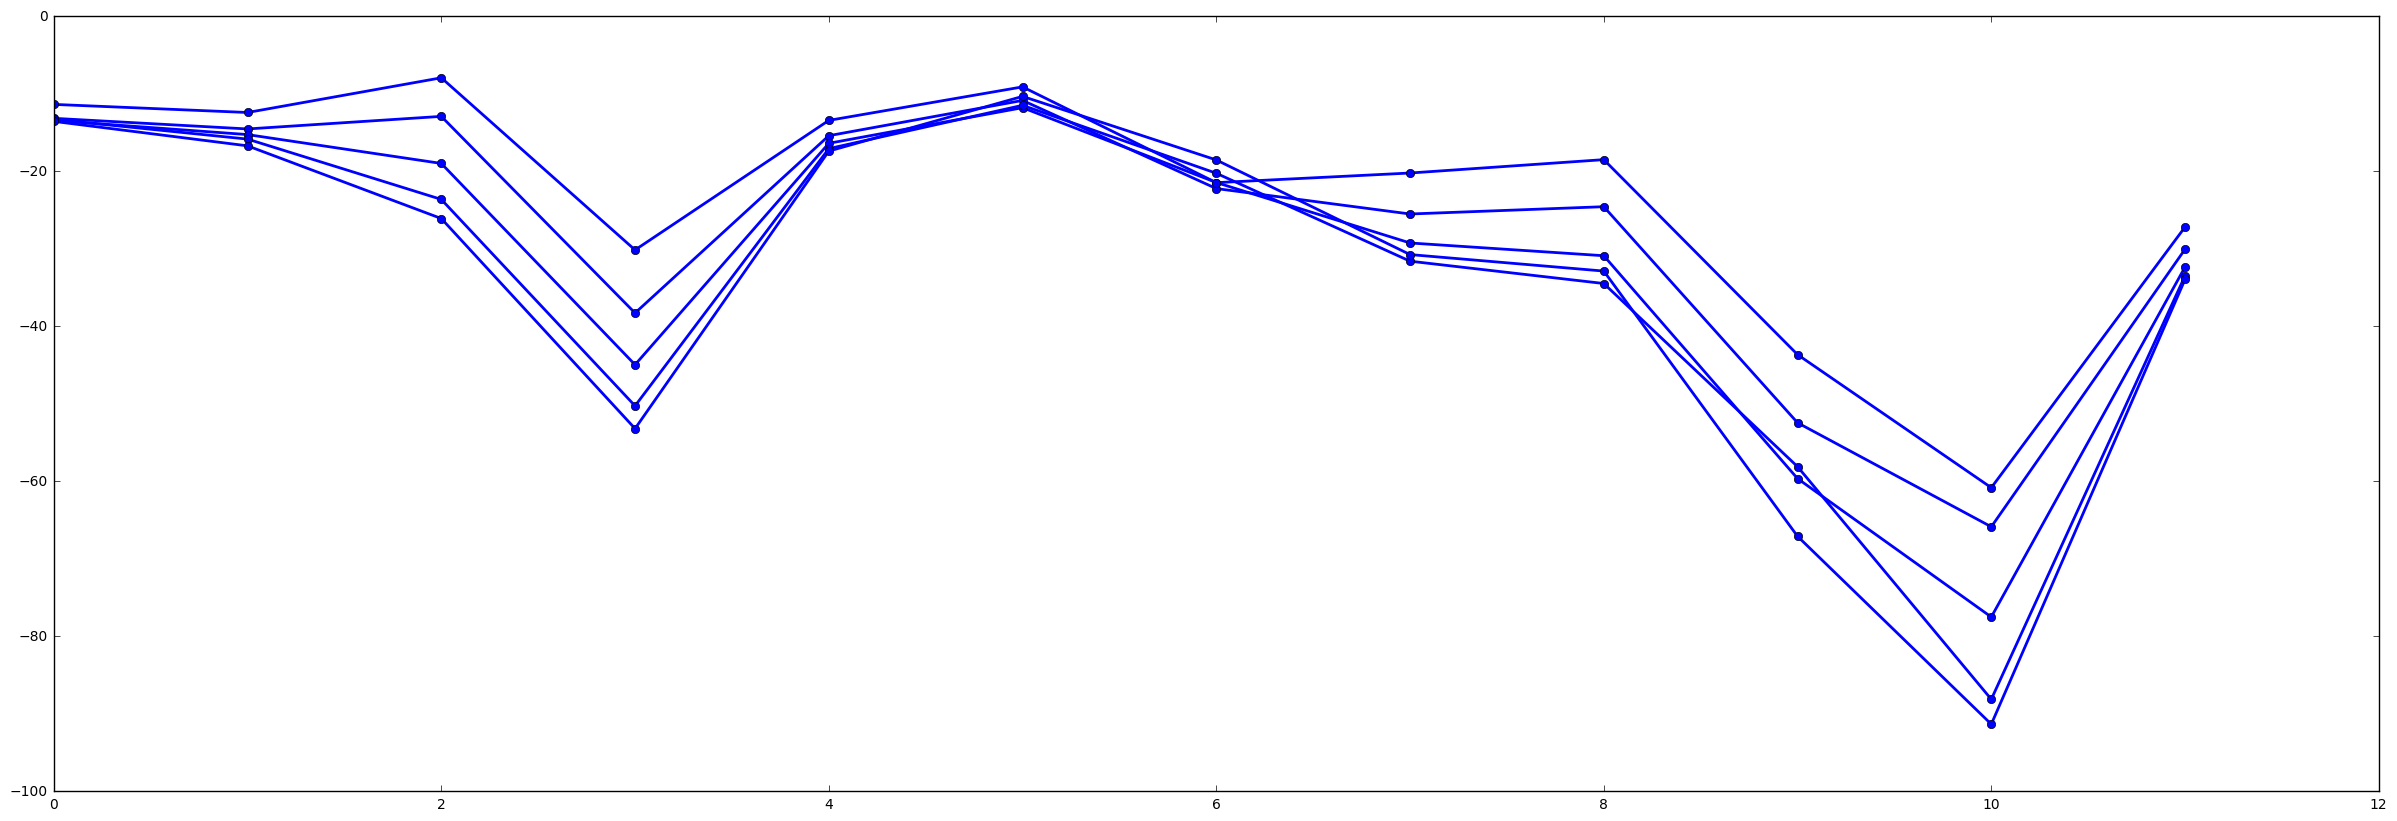

In [14]:
for i in xrange(0,5):
    res=plot_resistivity(i,edifiles)

In [15]:
def plotbar_pen_depth(per_index, edifiles):
    
    scale_param = np.sqrt(1.0 / (2.0 * np.pi * 4 * np.pi * 10 ** (-7)))
    
    #per_index=0,1,2,....    
    periods=[] 
    
    app_resis=[]
    
    stations=[]
    
    for afile in edifiles:
        mt_obj = mt.MT(afile)
    
        # the attribute Z
        zeta=mt_obj.Z
        
        if per_index>=len(zeta.freq):
            raise Exception("Index out_of_range Error: period index must be less than number of periods in zeta.freq")
        
        per=1.0/zeta.freq[per_index]
        periods.append(per)
       
        penetration_depth = - scale_param * np.sqrt(zeta.resistivity[per_index, 0, 1] * per)
        app_resis.append(penetration_depth)
        
        stations.append(mt_obj.station)
        
    #plt.plot(app_resis,color='b', marker='o')
    
    index = np.arange(len(app_resis))

    plt.bar(index, app_resis, color='#000000')

    # plt.xaxis.tick_top()
    # plt.set_xlabel('X LABEL')    
    # plt.xaxis.set_label_position('top') 

    plt.xlabel('Pentration Depth across Stations at MT period %s'%periods[0],fontsize=16)
    plt.ylabel('Penetration Depth (m)', fontsize=16)
    #plt.title('Penetration Depth profile for T=??')
    bar_width=0.4
    plt.xticks(index + bar_width / 2, stations, rotation='horizontal', fontsize=16)
    plt.legend()

    # plt.tight_layout()
    plt.gca().xaxis.tick_top()
    #plt.show()
    
    return (stations, app_resis,periods )

C:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


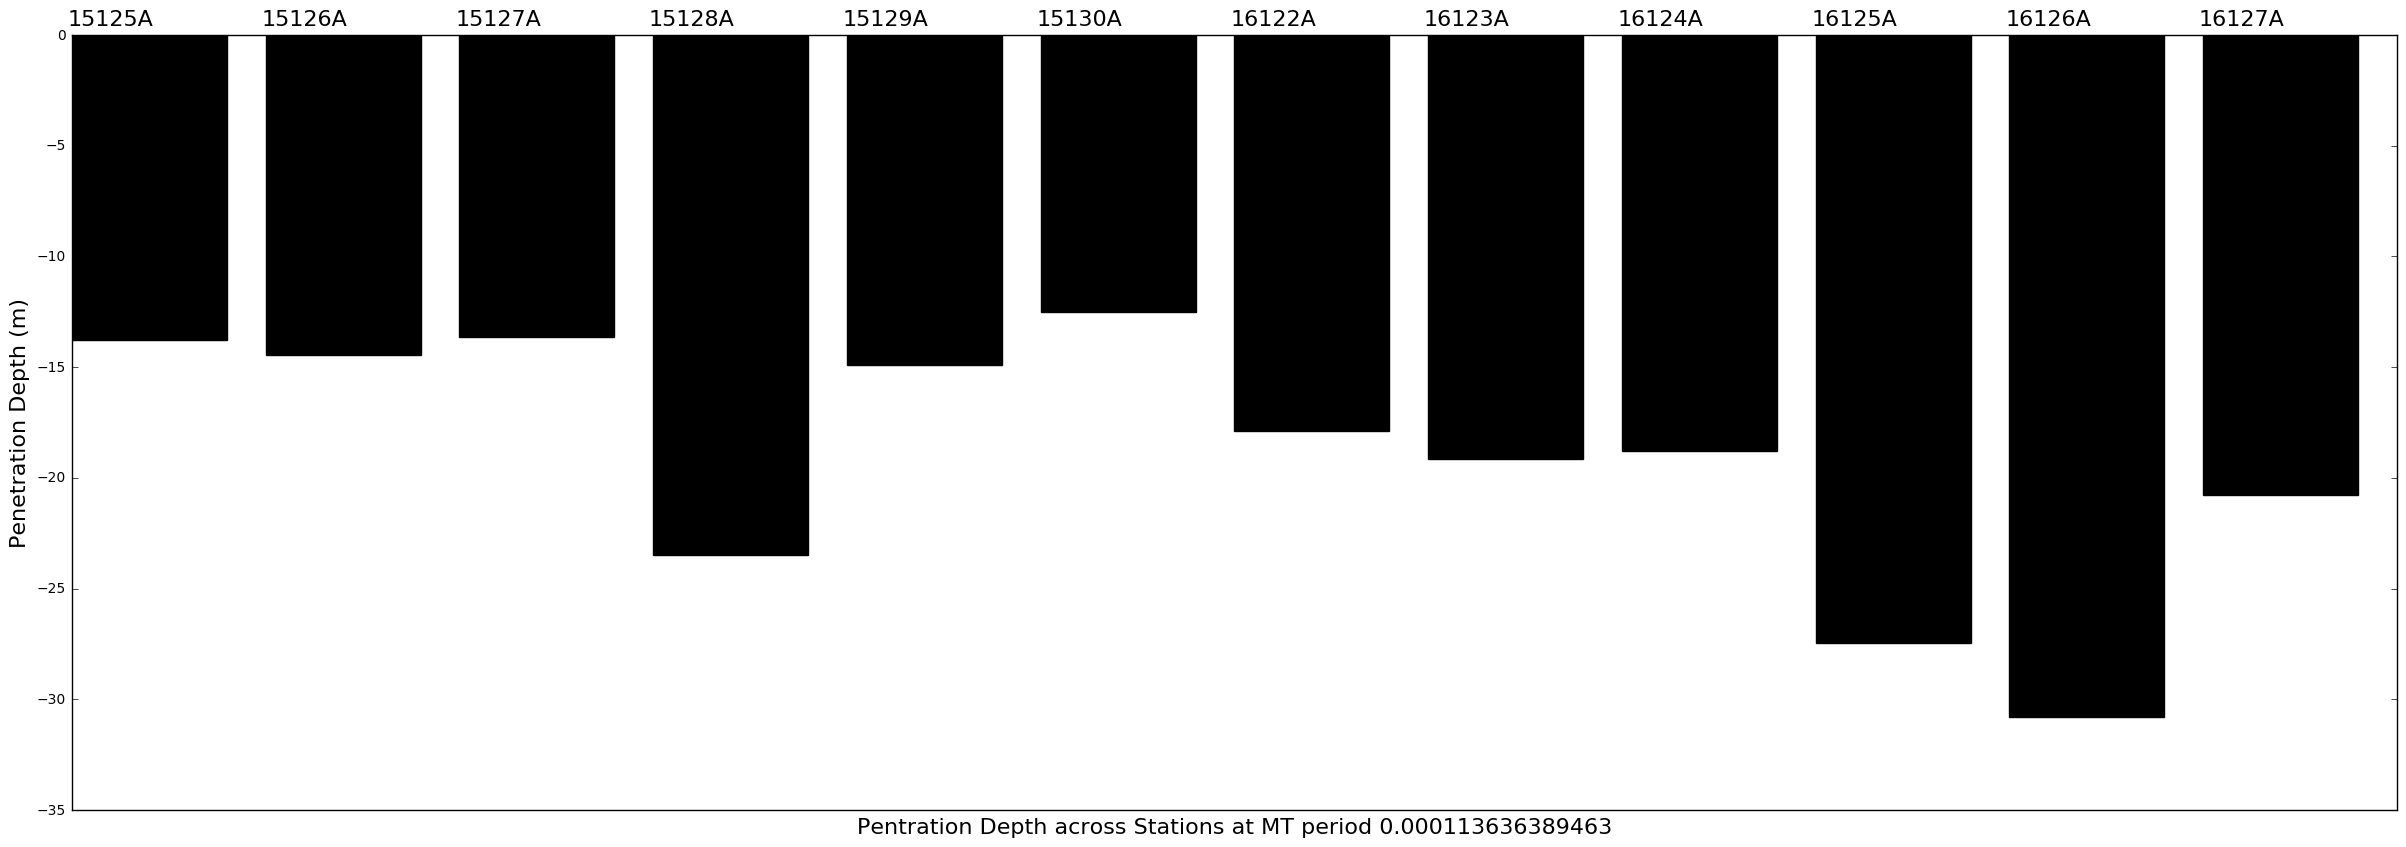

In [16]:
(stations, resistivity, periods)=plotbar_pen_depth(1,edifiles)

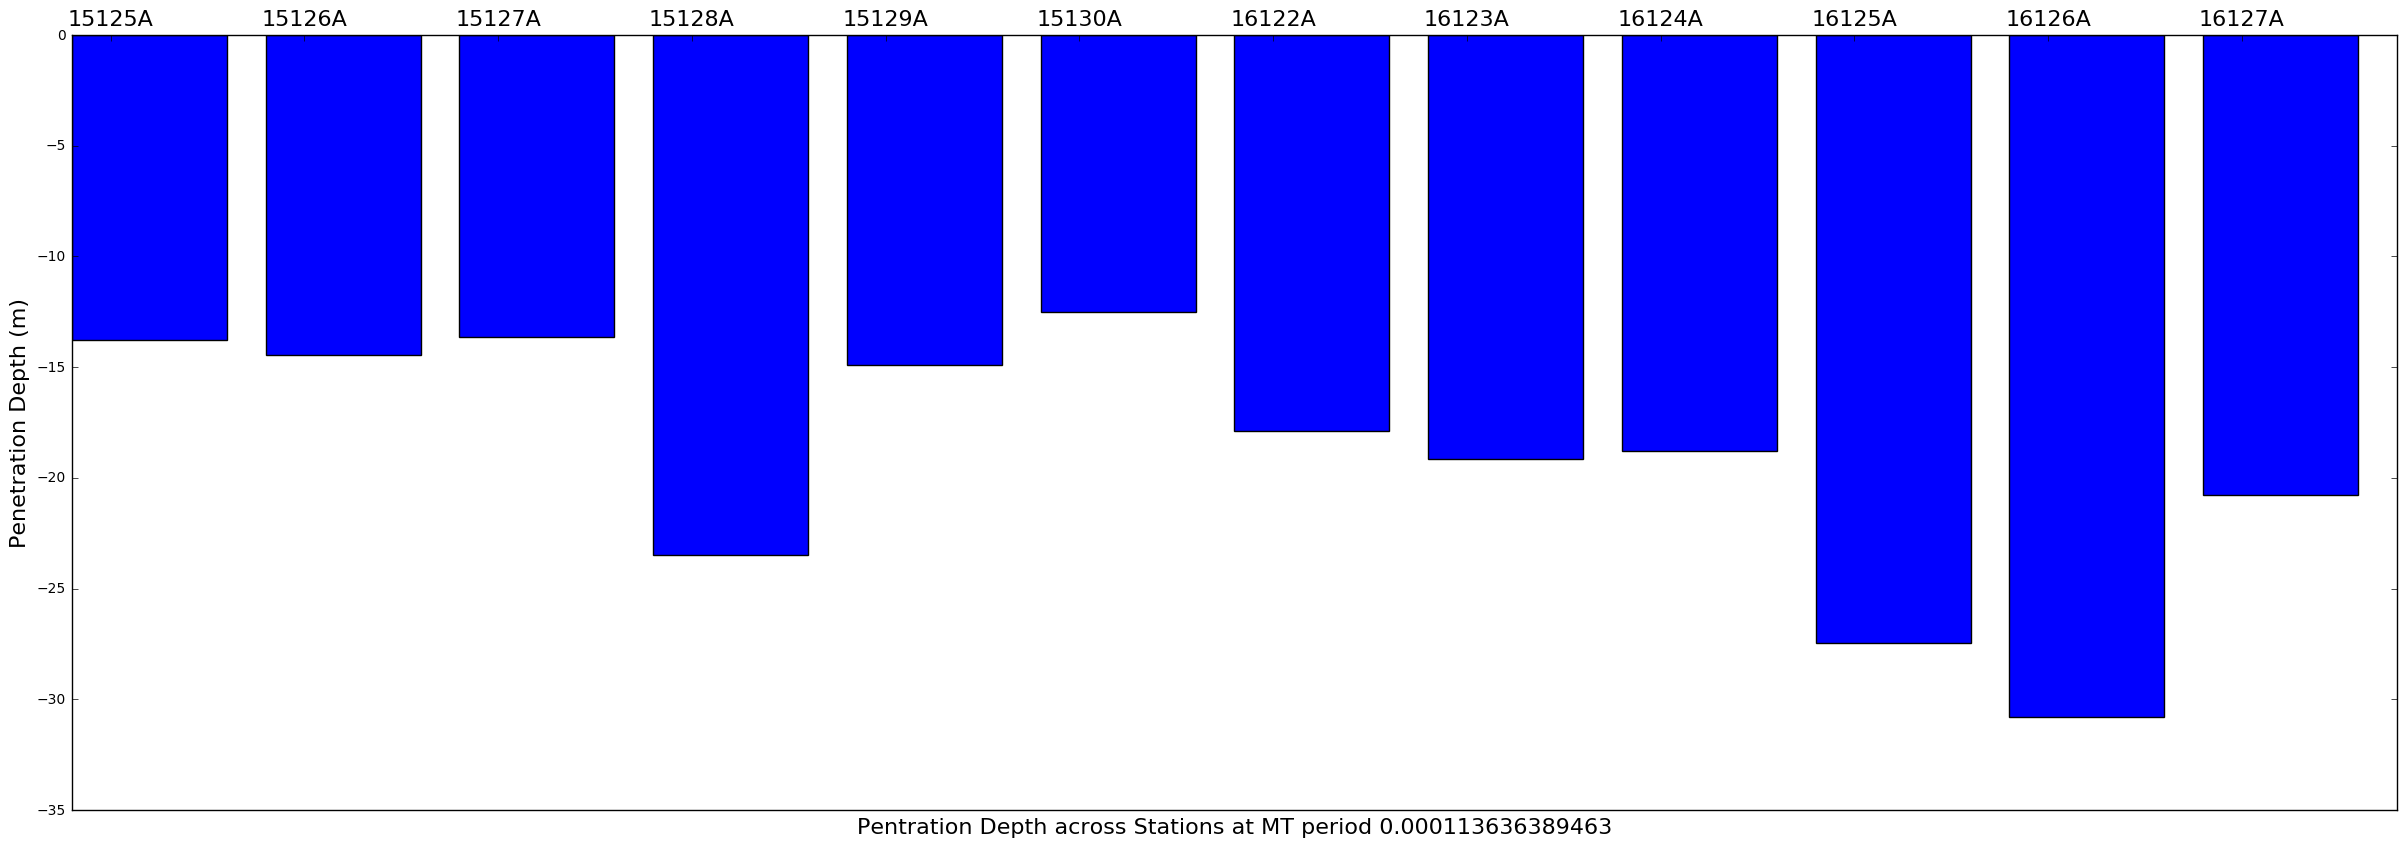

In [17]:
# Experiment with plot look-feel

index = np.arange(len(resistivity))

plt.bar(index, resistivity)

# plt.xaxis.tick_top()
# plt.set_xlabel('X LABEL')    
# plt.xaxis.set_label_position('top') 
plt.xlabel('Pentration Depth across Stations at MT period %s'%periods[0],fontsize=16)
plt.ylabel('Penetration Depth (m)', fontsize=16)
#plt.title('Penetration Depth profile for T=??')
bar_width=0.4
plt.xticks(index + bar_width / 2, stations, rotation='horizontal', fontsize=16)
plt.legend()

# plt.tight_layout()
plt.gca().xaxis.tick_top()
#plt.show()


0
1
2
3
4
5
6
7
8
9
10


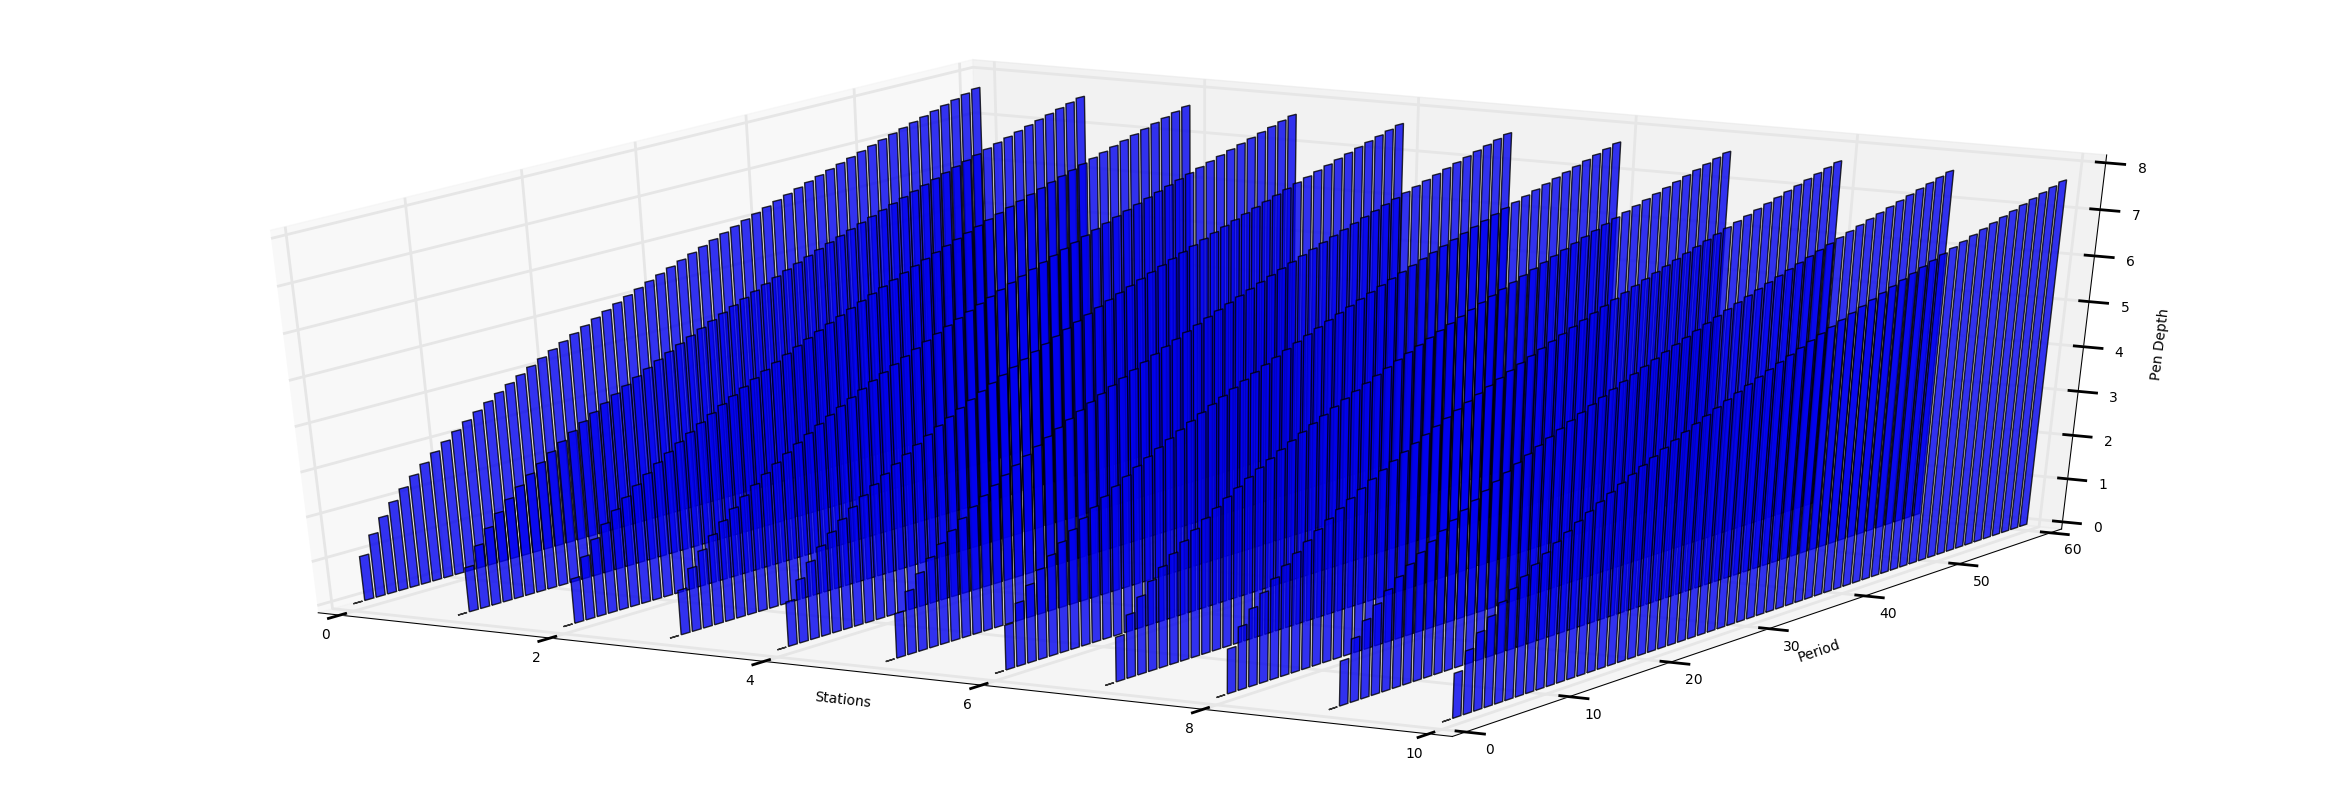

In [31]:
# 3D-plot of pen-depth over station and periods
# http://matplotlib.org/1.3.1/mpl_toolkits/mplot3d/tutorial.html

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#for c, z in zip(['r', 'g', 'b', 'y'], [0,1,2,3,4,5,6,7,8,9,10]):
for z in [0,1,2,3,4,5,6,7,8,9,10]:
    #print(c)
    print(z)
    
    xs = np.arange(60)
    ys = np.sqrt(xs) #np.random.rand(60)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    #cs = [c] * len(xs)
    cs = ['#0000ee'] * len(xs)
    #cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='x', color=cs, alpha=0.8)

ax.set_xlabel('Stations')
ax.set_ylabel('Period')
ax.set_zlabel('Pen Depth')

#plt.show()


In [61]:


def get_pen_depth_profile(edifiles):
    
    scale_param = np.sqrt(1.0 / (2.0 * np.pi * 4 * np.pi * 10 ** (-7)))
    

    stprofile={}
    for afile in edifiles:
        mt_obj = mt.MT(afile)
    
        # the attribute Z
        zeta=mt_obj.Z
        
        periods=1.0/zeta.freq         
        penetration_depth = scale_param * np.sqrt(zeta.resistivity[:, 0, 1] * periods[:])
        penetration_depth = scale_param * np.sqrt(zeta.resistivity[:, 1, 0] * periods[:])

#         app_resis.append(-penetration_depth)
        
        stprofile[mt_obj.station]=[penetration_depth, periods]

    return stprofile  # {station =>[penetration_depth,periods] }

In [62]:
station_prof=get_pen_depth_profile(edifiles)


In [63]:
station_prof.keys()

['16125A',
 '16124A',
 '16123A',
 '16127A',
 '15125A',
 '16126A',
 '15126A',
 '15127A',
 '16122A',
 '15128A',
 '15130A',
 '15129A']

In [64]:
station_prof.get('16125A')

[array([  1.98163774e+01,   2.44499509e+01,   2.92698851e+01,
          3.38674019e+01,   3.76785237e+01,   4.14028457e+01,
          4.75925426e+01,   5.28376412e+01,   2.10126875e+01,
          7.36478604e+00,   2.28749331e+01,   2.05371449e+01,
          1.05496574e+01,   9.54334441e+01,   1.12845622e+02,
          1.23464666e+02,   1.38823680e+02,   1.53302636e+02,
          1.65670204e+02,   1.81372254e+02,   1.95123529e+02,
          2.13578777e+02,   2.25830489e+02,   2.44425072e+02,
          2.67740711e+02,   2.89060300e+02,   3.09933491e+02,
          3.34926178e+02,   3.81852436e+02,   4.24723464e+02,
          4.72134620e+02,   5.16695381e+02,   6.06214329e+02,
          7.07434697e+02,   8.26062468e+02,   9.81349574e+02,
          1.15617854e+03,   1.32066995e+03,   1.54694304e+03,
          1.87275006e+03,   2.22137252e+03,   2.57149467e+03,
          3.02318739e+03,   3.70477376e+03,   4.29946527e+03,
          4.79053390e+03,   5.65134685e+03,   6.51015938e+03,
        

In [91]:

from mpl_toolkits.mplot3d import Axes3D

def plot_3Dbar_stations_profile( sta_profile):
    
    stations=sta_profile.keys()
    
    NUM_COLORS = len(stations)
    cm = plt.get_cmap('gist_rainbow')
    colors=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS) ]

    print colors
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    #for c, z in zip(['r', 'g', 'b', 'y'], [0,1,2,3,4,5,6,7,8,9,10]):
    for istation, z in enumerate(stations):
        #print(c)
        print(z)

        xs = np.log(station_prof.get(z)[1]) # periods
        ys = -station_prof.get(z)[0] # pen_dept
        
        # You can provide either a single color or an array. To demonstrate this,
        # the first bar of each set will be colored cyan.
        #cs = [c] * len(xs)
        cs =  [colors[istation]] * len(xs)  #['#0000ee'] * len(xs)
        #cs[-1] = (1.0, 0.0, 0.16, 1.0) # 'c'
        ax.bar(xs, ys, zs=istation, zdir='x', color=cs, alpha=0.9)

    ax.set_xlabel('Stations',fontsize=16)
    ax.set_ylabel('log(Period)', fontsize=16)
    ax.set_zlabel('Pen Depth',fontsize=16)

    #plt.show()



[(1.0, 0.0, 0.16, 1.0), (1.0, 0.28298887122416538, 0.0, 1.0), (1.0, 0.72813990461049294, 0.0, 1.0), (0.80551139374668779, 1.0, 0.0, 1.0), (0.36036036036036034, 1.0, 0.0, 1.0), (0.0, 1.0, 0.084334809192493934, 1.0), (0.0, 1.0, 0.54817625975121254, 1.0), (0.0, 1.0, 0.99093400801180731, 1.0), (0.0, 0.56159420289855033, 1.0, 1.0), (0.0, 0.092710997442455145, 1.0, 1.0), (0.35485933503836337, 0.0, 1.0, 1.0), (0.80242966751918188, 0.0, 1.0, 1.0)]
16125A
16124A
16123A
16127A
15125A
16126A
15126A
15127A
16122A
15128A
15130A
15129A


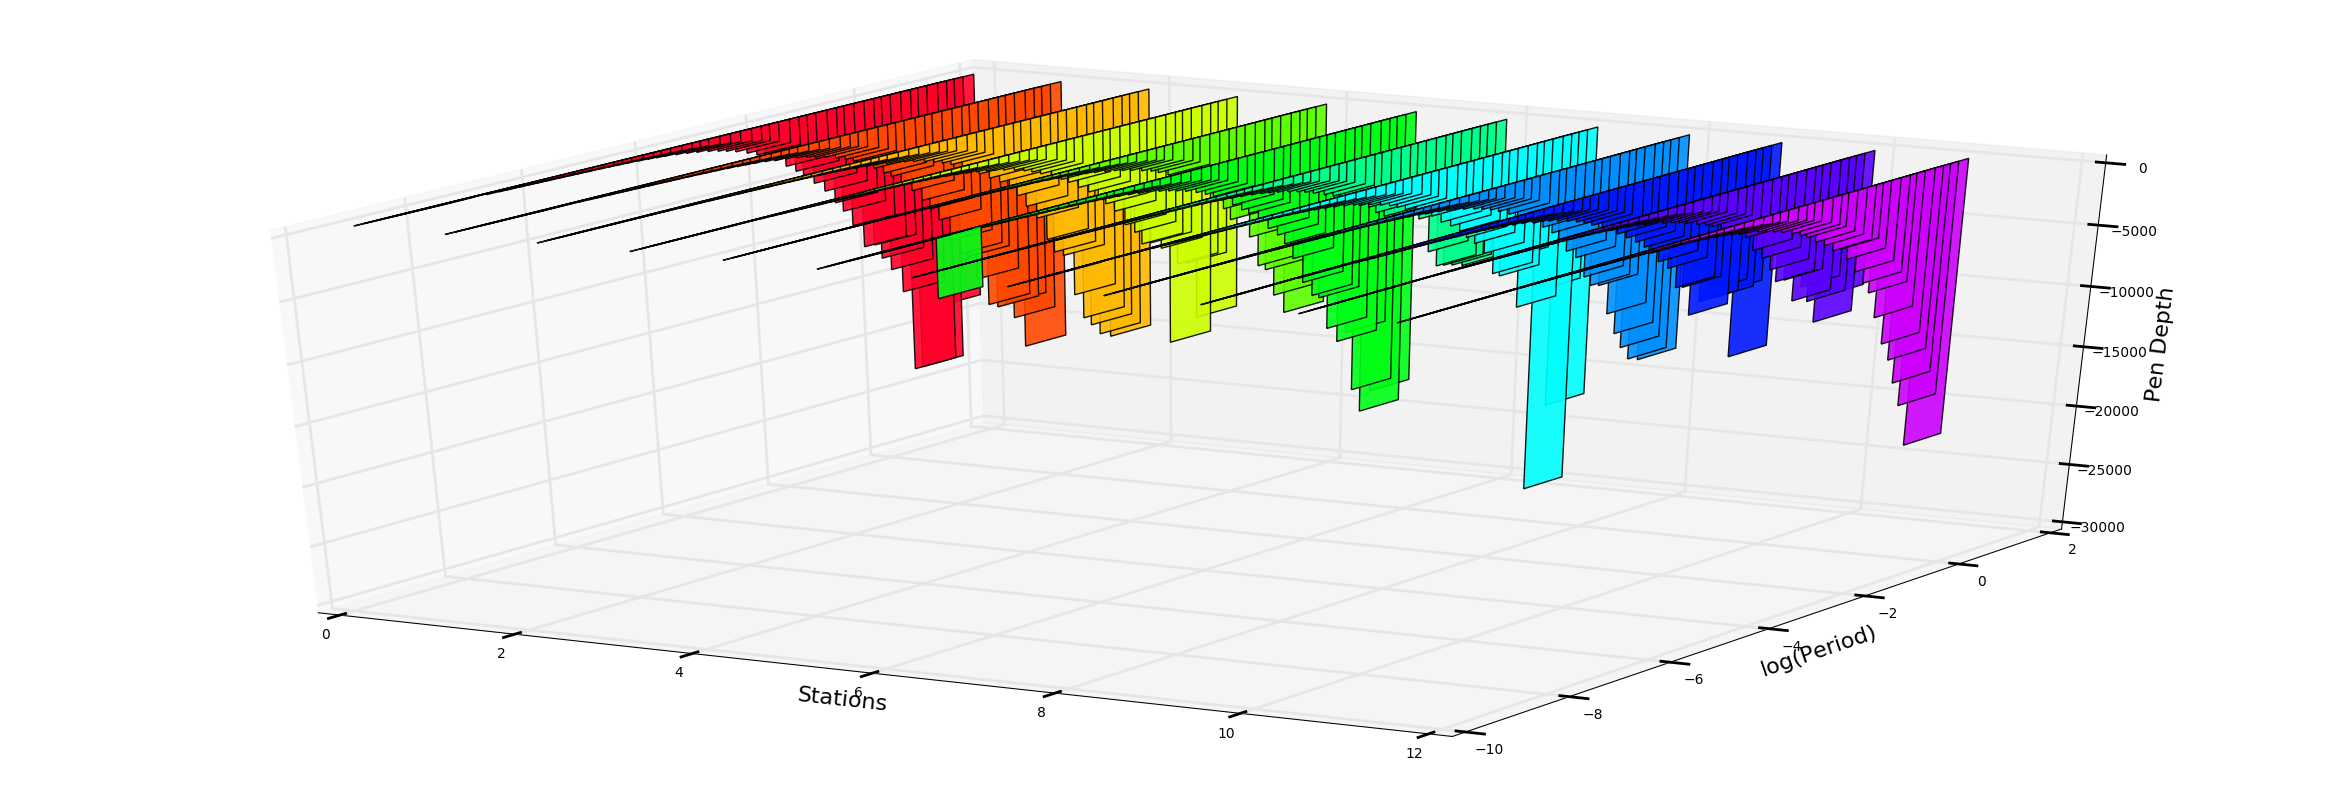

In [92]:
plot_3Dbar_stations_profile(station_prof)

In [69]:
NUM_COLORS = 12

cm = plt.get_cmap('gist_rainbow')

for i in range(NUM_COLORS):
    color = cm(1.*i/NUM_COLORS)  # color will now be an RGBA tuple
    print color

(1.0, 0.0, 0.16, 1.0)
(1.0, 0.28298887122416538, 0.0, 1.0)
(1.0, 0.72813990461049294, 0.0, 1.0)
(0.80551139374668779, 1.0, 0.0, 1.0)
(0.36036036036036034, 1.0, 0.0, 1.0)
(0.0, 1.0, 0.084334809192493934, 1.0)
(0.0, 1.0, 0.54817625975121254, 1.0)
(0.0, 1.0, 0.99093400801180731, 1.0)
(0.0, 0.56159420289855033, 1.0, 1.0)
(0.0, 0.092710997442455145, 1.0, 1.0)
(0.35485933503836337, 0.0, 1.0, 1.0)
(0.80242966751918188, 0.0, 1.0, 1.0)


C:\Anaconda2\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


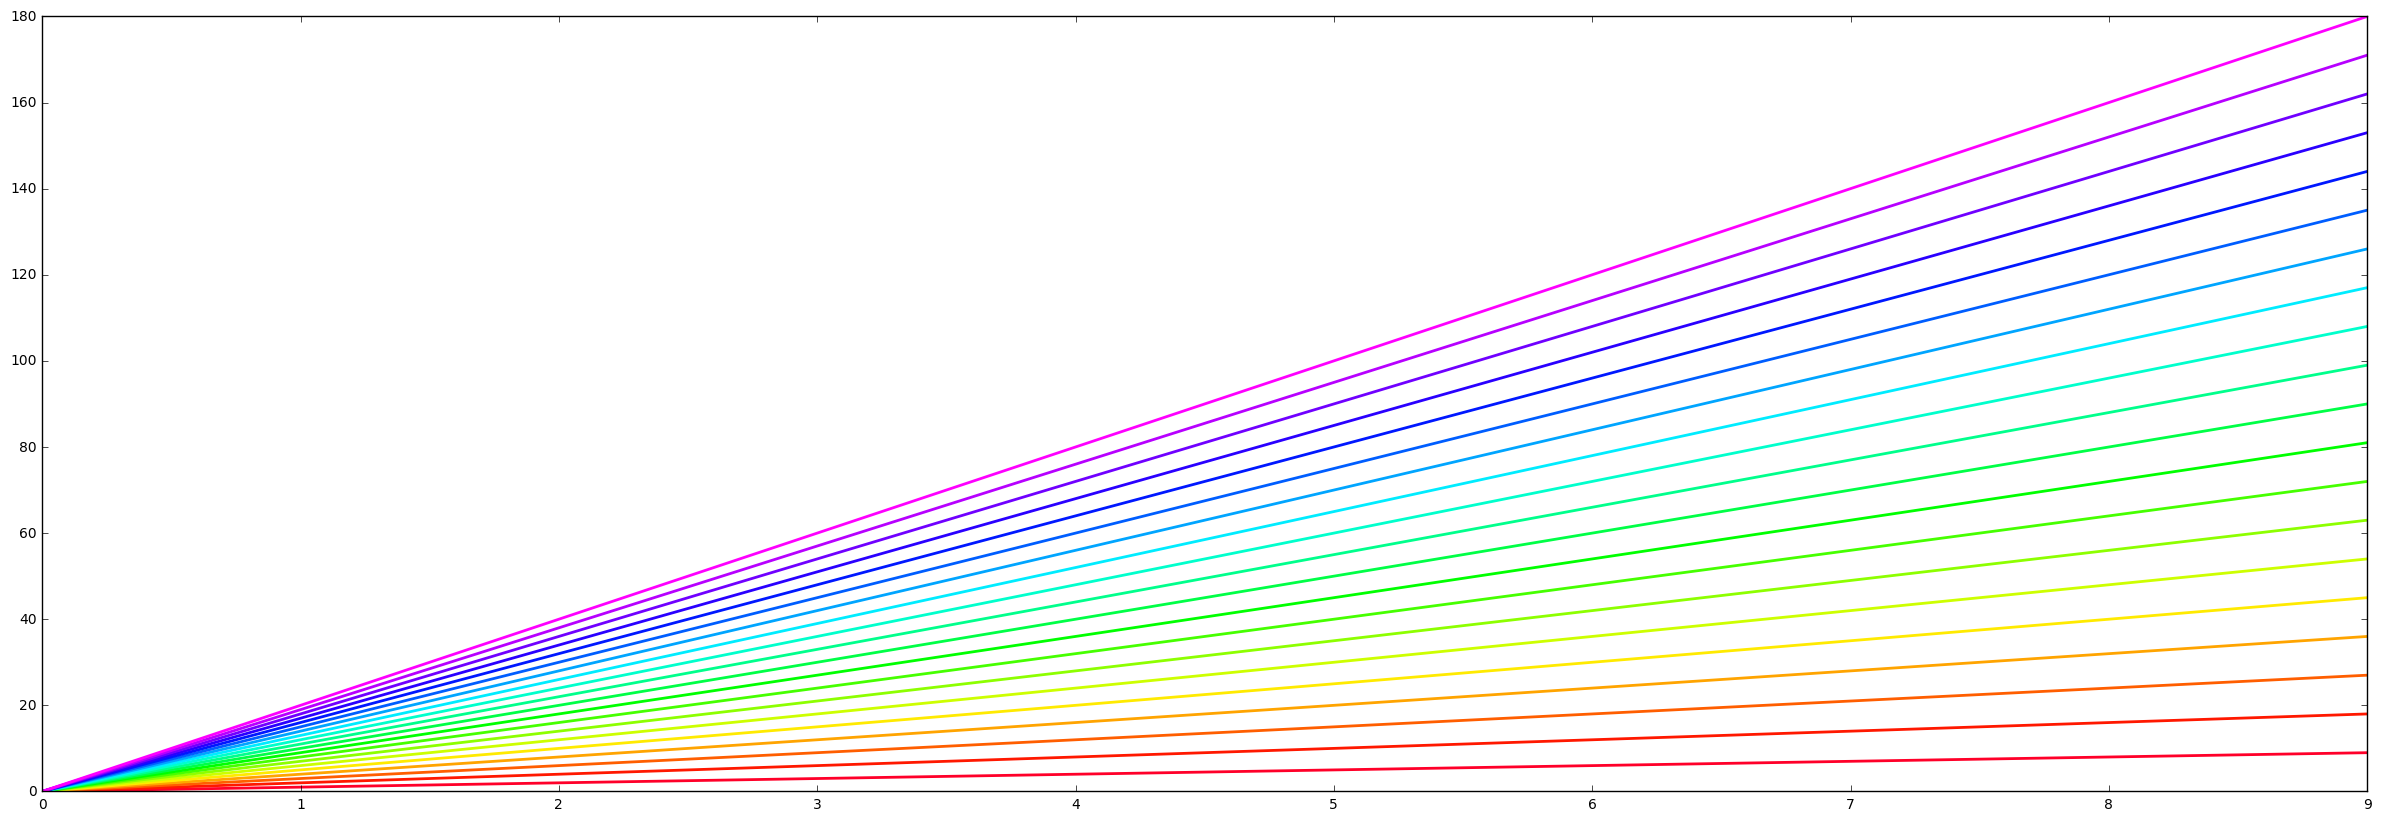

In [66]:
import matplotlib.pyplot as plt
import numpy as np

NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(NUM_COLORS):
    ax.plot(np.arange(10)*(i+1))

fig.savefig('moreColors.png')
plt.show()


## Penetration Depth Parameter

### The parameter  sqrt(1/(2 pi mu_0))

P_scale_meter =np.sqrt(1.0/(2.0*np.pi*4*np.pi*10**(-7)))

print(P_scale_meter)


# P_scale_meter=355.88127171

# Test use the module mtpy.analysis.niblettbostick 

In [19]:
import mtpy.analysis.niblettbostick as nibbos

In [20]:
 for i, per in enumerate(periods):
    print per
    
    dep01=P_scale_meter*np.sqrt(zeta.resistivity[i][0,1]*per)
    dep10=P_scale_meter*np.sqrt(zeta.resistivity[i][1,0]*per)
    
    te_rho, te_depth = nibbos.rhophi2rhodepth(zeta.resistivity[i][0, 1], zeta.phase[i][0, 1], per)
    tm_rho, tm_depth = nibbos.rhophi2rhodepth(zeta.resistivity[i][1, 0], zeta.phase[i][1, 0], per)

#     print(te_rho, te_depth)
#     print(tm_rho, tm_depth)

    print(dep01, te_depth)  # check if they are the smae value?
    print(dep10, tm_depth)
    

0.000113636389463
(12.779623054512545, 12.779623054512545)
(13.032734850035524, 13.032734850035522)
0.000113636389463
(13.753636056112969, 13.753636056112967)
(13.388250028610219, 13.388250028610221)
0.000113636389463
(13.89963893651934, 13.899638936519336)
(13.509828818258402, 13.509828818258404)
0.000113636389463
(13.824982177823822, 13.82498217782382)
(13.495528665687077, 13.495528665687077)
0.000113636389463
(13.959384342327422, 13.959384342327422)
(13.520054870751519, 13.520054870751519)
0.000113636389463
(14.003133461906764, 14.003133461906762)
(13.652713541482031, 13.652713541482029)
0.000113636389463
(13.963943655318326, 13.963943655318326)
(13.695900633707662, 13.695900633707662)
0.000113636389463
(14.090096390973436, 14.090096390973436)
(13.598234135743033, 13.598234135743034)
0.000113636389463
(14.212348725897638, 14.212348725897636)
(13.583665721531091, 13.583665721531091)
0.000113636389463
(14.330679887749648, 14.330679887749648)
(13.587912132682884, 13.587912132682884)
0.

In [21]:
nibbos.calculate_znb(z_array=zeta.z, periods=periods)

???????????????

Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.


TypeError: only integer arrays with one element can be converted to an index

In [ ]:

det2=np.abs(zeta.det[0])

det_penetration_depth= P_scale_meter* np.sqrt(0.2*periods*det2*periods)


plt.semilogx(periods, -det_penetration_depth, '-*')

plt.title("Determinant Penetration Depth im Meters")

plt.xlabel("Period (seconds))")

plt.ylabel("Depth Meters")
plt.grid(True)

In [ ]:
det_penetration_depth